# Model Results Analysis

In [250]:
import pandas as pd
import requests
import pvlib
import matplotlib.pyplot as plt  # for visualization
import math
from datetime import datetime
#from ast import literal_eval
import numpy as np
from statistics import median
from statistics import mean

In [251]:
#variables - MAKE SURE THESE ARE IDENTICAL TO WHAT WAS USED IN THE MODEL
myNetworks = ['bowling green','long island city','sunnyside','crown heights','grasslands','fresh kills','williamsburg','northeast bronx','ridgewood']

#these are the columns with lists in them
strToList = ['dailyPVWAC_4M','annualPVkWhDC_degraded','annualPVkWhAC_degraded','avoidedGridCosts','avgAutoParticipationMonthlyW_C','avgAutoParticipationMonthlyW_D','avgAutoParticipationAnnualW_C','avgAutoParticipationAnnualW_D','drIncMonthly_C','drIncMonthly_D','drIncAnnual_C','drIncAnnual_D','drPerformanceIncome','annualBenefit']

# Read Data

## Read Model Results

In [252]:
#submitted paper results
results_df = pd.read_csv('results/results_df_1738375421.csv')

#V-5B analysis results
# results_df = pd.read_csv('results/results_df_1735343451.csv')
#drop the index if it was saved in the  file
results_df = results_df.drop(columns='Unnamed: 0')
results_df.head()

network  eventStart   az  pvW            batModel    batWh  \
0  bowling green          11  180  250   Explorer 300 Plus   288.00   
1  bowling green          11  180  250   Explorer 600 Plus   632.00   
2  bowling green          11  180  250   Explorer 700 Plus   680.96   
3  bowling green          11  180  250  Explorer 1000 Plus  1264.64   
4  bowling green          11  180  250  Explorer 2000 Plus  2042.80   

       batWhAC    effEff  dischargeRateW        capex  ...  \
0   248.006116  0.861132          57.600   776.311413  ...   
1   540.175879  0.854709         126.400   992.983550  ...   
2   577.988608  0.848785         136.192  1102.936413  ...   
3  1069.192875  0.845452         252.928  1537.358550  ...   
4  1733.894465  0.848783         408.560  2626.108550  ...   

                                       drIncAnnual_C  \
0  [np.float64(13.32457001422619), np.float64(13....   
1  [np.float64(18.353211582577), np.float64(18.25...   
2  [np.float64(18.92852892866155), np.float64(18....   
3  [np.float64(27.23149471728565), np.float64(27....   
4  [np.float64(38.65753093196283), np.float64(38....   

                                       drIncAnnual_D  \
0  [np.float64(3.3412652024008267), np.float64(3....   
1  [np.float64(8.599690596496485), np.float64(8.5...   
2  [np.float64(9.279668554286086), np.float64(9.2...   
3  [np.float64(18.12114317705477), np.float64(18....   
4  [np.float64(30.086125309106254), np.float64(30...   

                                 drPerformanceIncome  \
0  [np.float64(1.7766093352301588), np.float64(1....   
1  [np.float64(2.447094877676933), np.float64(2.4...   
2  [np.float64(2.5238038571548733), np.float64(2....   
3  [np.float64(3.6308659623047532), np.float64(3....   
4  [np.float64(5.1543374575950445), np.float64(5....   

                                       annualBenefit     LCOSS          NPV  \
0  [np.float64(67.80289389057582), np.float64(68....  0.069859  -388.972230   
1  [np.float64(78.3922386888281), np.float64(78.7...  0.039379  -489.856108   
2  [np.float64(79.38469373760695), np.float64(79....  0.041863  -602.926817   
3  [np.float64(97.44517027835336), np.float64(97....  0.034581 -1034.374752   
4  [np.float64(122.55058912502592), np.float64(12...  0.039409 -2114.279215   

         PBP Cycles   lifespan workingLife  
0  11.214416   3000   8.219178    8.219178  
1  12.463490   4000  10.958904   10.000000  
2  13.657096   4000  10.958904   10.000000  
3  15.587990   4000  10.958904   10.000000  
4  21.205823   4000  10.958904   10.000000  

[5 rows x 35 columns]

In [253]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   network                         83 non-null     object 
 1   eventStart                      83 non-null     int64  
 2   az                              83 non-null     int64  
 3   pvW                             83 non-null     int64  
 4   batModel                        83 non-null     object 
 5   batWh                           83 non-null     float64
 6   batWhAC                         82 non-null     float64
 7   effEff                          82 non-null     float64
 8   dischargeRateW                  83 non-null     float64
 9   capex                           83 non-null     float64
 10  dollarPerBatkWh                 83 non-null     float64
 11  dailyPVWAC_4M                   83 non-null     object 
 12  annualPVkWhDC_degraded          83 non

In [254]:
results_df.columns

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'LCOSS', 'NPV',
       'PBP', 'Cycles', 'lifespan', 'workingLife'],
      dtype='object')

In [255]:
safe_env = {"np": np, "nan": np.nan}
for c in strToList:
    results_df[c] = results_df[c].apply(lambda x: eval(str(x),safe_env))


In [256]:
# #check data types if needed
# for k in list(results_df.keys()):
#     #print(k)
#     #print(type(results_df.iloc[0][k]))
#     if type(results_df.iloc[0][k]).__name__ == 'str':
#         print('str: ' + k)
#         print(type(results_df.iloc[0][k][0]))
#     elif type(results_df.iloc[0][k]).__name__ == 'list':
#         print('list')
#         print(type(results_df.iloc[0][k][0]))
#     #print(results_df.iloc[0][k])

In [257]:
#results_df.describe()

# Filter Results

In [258]:
# #PV <= 1000W
# results_df = results_df[results_df['pvW']<=1000]

# #Bat Wh <= 2100Wh
# results_df = results_df[results_df['batWh']<=2100]

In [259]:
results_df.describe()

eventStart     az    pvW        batWh      batWhAC     effEff  \
count        83.0   83.0   83.0    83.000000    82.000000  82.000000   
mean         11.0  180.0  250.0  1216.316867  1032.217167   0.853115   
std           0.0    0.0    0.0   801.521684   690.741294   0.011002   
min          11.0  180.0  250.0    99.900000    84.696594   0.822648   
25%          11.0  180.0  250.0   515.000000   443.170984   0.846014   
50%          11.0  180.0  250.0  1024.000000   860.383208   0.856714   
75%          11.0  180.0  250.0  2021.000000  1724.609502   0.861132   
max          11.0  180.0  250.0  3686.000000  3180.861001   0.872238   

       dischargeRateW        capex  dollarPerBatkWh  immediateEventAmt  \
count       83.000000    83.000000        83.000000               83.0   
mean       243.263373  1250.570519         0.001391                0.0   
std        160.304337   569.694431         0.000828                0.0   
min         19.980000   590.146050         0.000565                0.0   
25%        103.000000   792.103731         0.000837                0.0   
50%        204.800000  1101.858550         0.001182                0.0   
75%        404.200000  1537.358550         0.001608                0.0   
max        737.200000  3596.184800         0.006125                0.0   

        avgMAPw_C   avgMAPw_D  totalDRratekW      LCOSS          NPV  \
count   82.000000   82.000000           83.0  82.000000    82.000000   
mean   293.257194  193.962682           36.0   0.039623  -810.193080   
std    133.506585  138.155207            0.0   0.020997   546.890673   
min    109.076370    4.433638           36.0   0.017282 -3066.417893   
25%    180.152427   76.166343           36.0   0.026477 -1119.012656   
50%    257.766209  159.579386           36.0   0.035157  -629.228330   
75%    427.682718  332.455886           36.0   0.046917  -391.139648   
max    710.442054  623.708470           36.0   0.169628  -158.354091   

             PBP       Cycles   lifespan  workingLife  
count  83.000000    83.000000  83.000000    83.000000  
mean   12.398336  3412.048193   9.348077     8.998185  
std     3.160780   573.052926   1.570008     0.935940  
min     8.750000  2000.000000   5.479452     5.479452  
25%    10.182095  3000.000000   8.219178     8.219178  
50%    11.214780  3500.000000   9.589041     9.589041  
75%    13.344551  3500.000000   9.589041     9.589041  
max    24.894269  6000.000000  16.438356    10.000000

## Read in network data

In [260]:
# read in hardware data to dataframe
networks_df = pd.read_csv('data/conEdNetworks2024.csv')

display(networks_df.head())

borough          network start time end time  tier
0   bronx    central bronx      16:00    20:00     2
1   bronx          fordham      16:00    20:00     2
2   bronx  northeast bronx      16:00    20:00     2
3   bronx        riverdale      16:00    20:00     2
4   bronx  southeast bronx      16:00    20:00     2

In [261]:
#returns the network info for a given network
#args: network name
def getNetworkInfo(networkName):
    return networks_df.loc[networks_df['network']== networkName]

#returns the tier for a given item in the network info list
#args: network name
def getDLRPrate(networkName):
    n = getNetworkInfo(networkName)
    t = n['tier'].iloc[0]
    #tier 2 networks pay at a higher rate
    if t == 1:
        return 18
    else:
        return 25
    
#returns the borough for a given item in the network info list
#args: network name
def getCSRPrate(networkName):
    n = getNetworkInfo(networkName)
    t = n['borough'].iloc[0]
    #westchester and staten island pay at a lower rate
    if t not in ['westchester','staten island']:
        return 18
    else:
        return 6

#args: network name
def getTotalRate(networkName):
    return getDLRPrate(networkName) + getCSRPrate(networkName)
    
#returns borough name
#args: network name
def getBorough(networkName):
    n = getNetworkInfo(networkName)
    return n['borough'].iloc[0]

#returns event start time
#args: network name
def getStartTime(networkName):
    n = getNetworkInfo(networkName)
    return int(n['start time'].iloc[0].split(":")[0])

# Analyze Results

## Filtering to Favorable PBP and NPV

In [262]:
#filter out anything with an ROI over its working years
favPBP_df = results_df[results_df['PBP'] <= results_df['workingLife']] 

favNPV_df = results_df[results_df['NPV'] >= 0] 

fav_df = favPBP_df[favPBP_df['NPV'] >= 0] 

In [263]:
favPBP_df.describe()

eventStart     az    pvW        batWh      batWhAC    effEff  \
count         5.0    5.0    5.0     5.000000     5.000000  5.000000   
mean         11.0  180.0  250.0   568.400000   485.691542  0.846844   
std           0.0    0.0    0.0   384.417481   335.436399  0.018811   
min          11.0  180.0  250.0   256.000000   210.597932  0.822648   
25%          11.0  180.0  250.0   288.000000   239.178938  0.830482   
50%          11.0  180.0  250.0   512.000000   438.999727  0.857421   
75%          11.0  180.0  250.0   576.000000   496.012231  0.861132   
max          11.0  180.0  250.0  1210.000000  1043.668881  0.862536   

       dischargeRateW       capex  dollarPerBatkWh  immediateEventAmt  \
count        5.000000    5.000000         5.000000                5.0   
mean       113.680000  697.061300         0.001554                0.0   
std         76.883496  109.126211         0.000666                0.0   
min         51.200000  590.146050         0.000714                0.0   
25%         57.600000  622.808550         0.001289                0.0   
50%        102.400000  666.358550         0.001301                0.0   
75%        115.200000  742.571050         0.002163                0.0   
max        242.000000  863.422300         0.002305                0.0   

        avgMAPw_C   avgMAPw_D  totalDRratekW     LCOSS         NPV       PBP  \
count    5.000000    5.000000            5.0  5.000000    5.000000  5.000000   
mean   188.507425   84.651421           36.0  0.035031 -245.991019  9.150000   
std     65.657687   67.104124            0.0  0.011452   93.180558  0.360362   
min    134.162157   29.609265           36.0  0.019663 -390.323542  8.750000   
25%    139.882205   35.329313           36.0  0.030631 -283.902022  8.833333   
50%    179.873297   75.320404           36.0  0.032016 -211.055196  9.166667   
75%    191.283493   86.730600           36.0  0.045977 -186.320246  9.416667   
max    297.335972  196.267521           36.0  0.046869 -158.354091  9.583333   

       Cycles  lifespan  workingLife  
count     5.0  5.000000     5.000000  
mean   3500.0  9.589041     9.589041  
std       0.0  0.000000     0.000000  
min    3500.0  9.589041     9.589041  
25%    3500.0  9.589041     9.589041  
50%    3500.0  9.589041     9.589041  
75%    3500.0  9.589041     9.589041  
max    3500.0  9.589041     9.589041

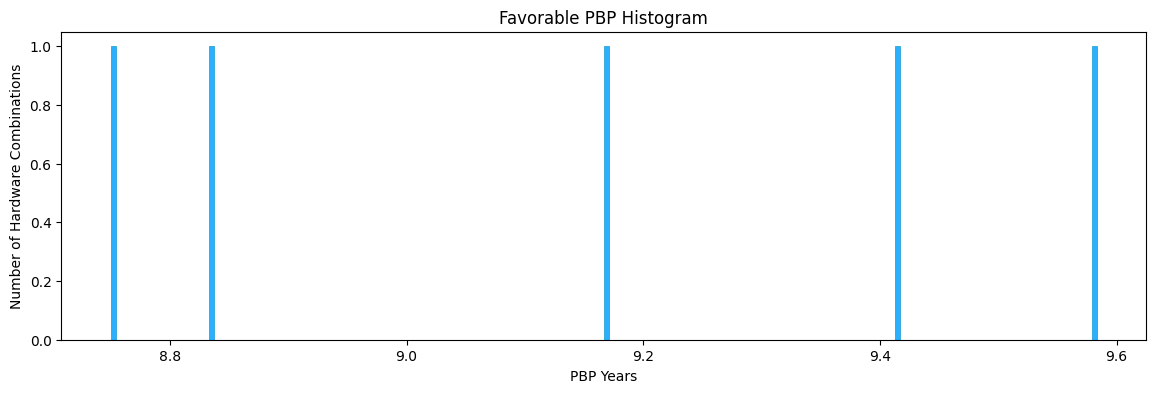

In [264]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favPBP_df['PBP'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Favorable PBP Histogram') 
plt.xlabel('PBP Years') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

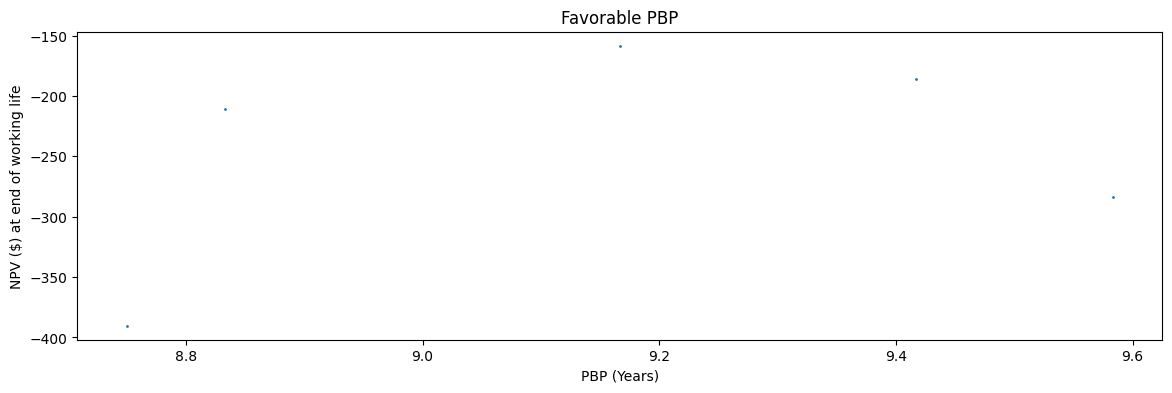

In [265]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(favPBP_df['PBP'],favPBP_df['NPV'], s=1)
plt.title('Favorable PBP') 
plt.xlabel('PBP (Years)') 
plt.ylabel('NPV ($) at end of working life') 
plt.show()

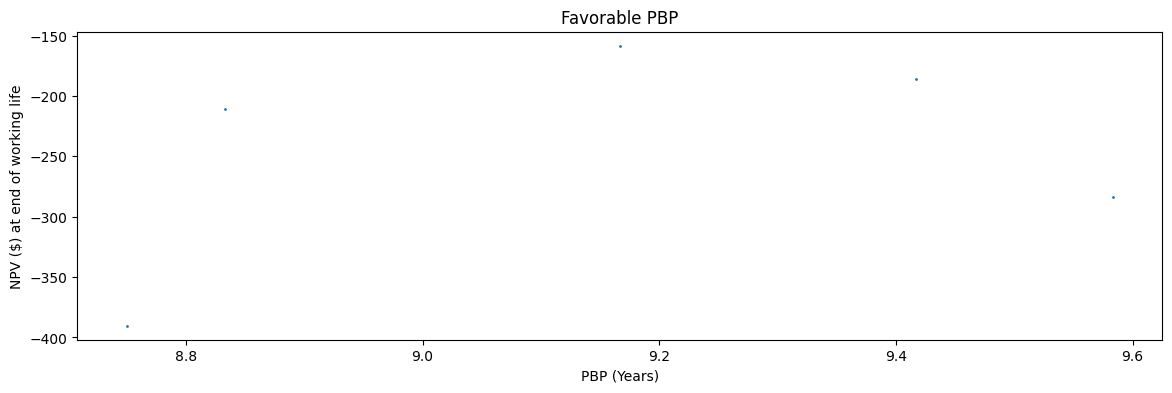

In [266]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(favPBP_df[favPBP_df['NPV']<= 0]['PBP'],favPBP_df[favPBP_df['NPV']<= 0]['NPV'], s=1)
plt.title('Favorable PBP') 
plt.xlabel('PBP (Years)') 
plt.ylabel('NPV ($) at end of working life') 
plt.show()

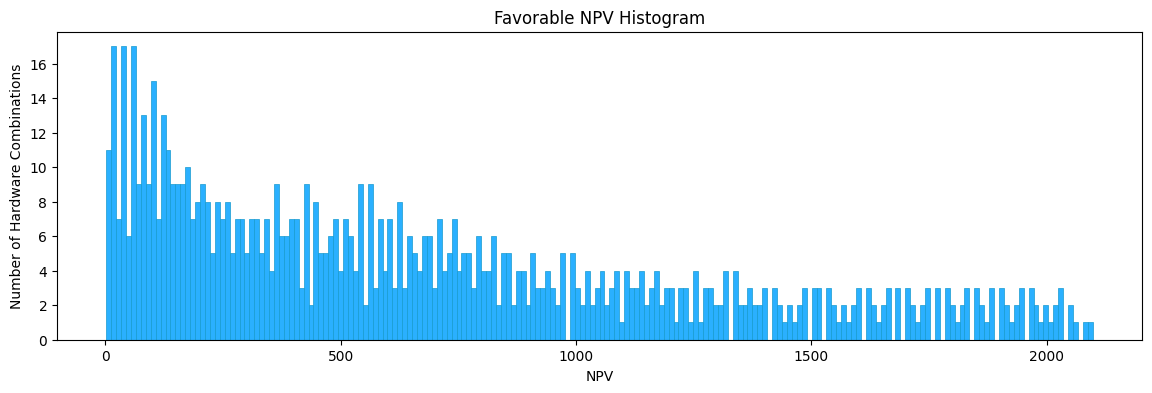

In [247]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favNPV_df['NPV'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Favorable NPV Histogram') 
plt.xlabel('NPV') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

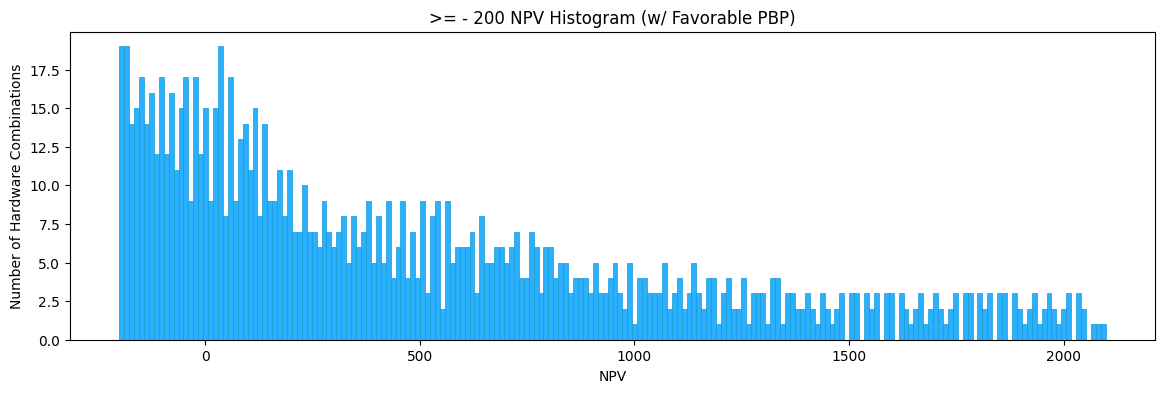

In [248]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favPBP_df[favPBP_df['NPV']>=-200]['NPV'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('>= - 200 NPV Histogram (w/ Favorable PBP)') 
plt.xlabel('NPV') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

Text(0.5, 1.0, 'PBP and NPV')

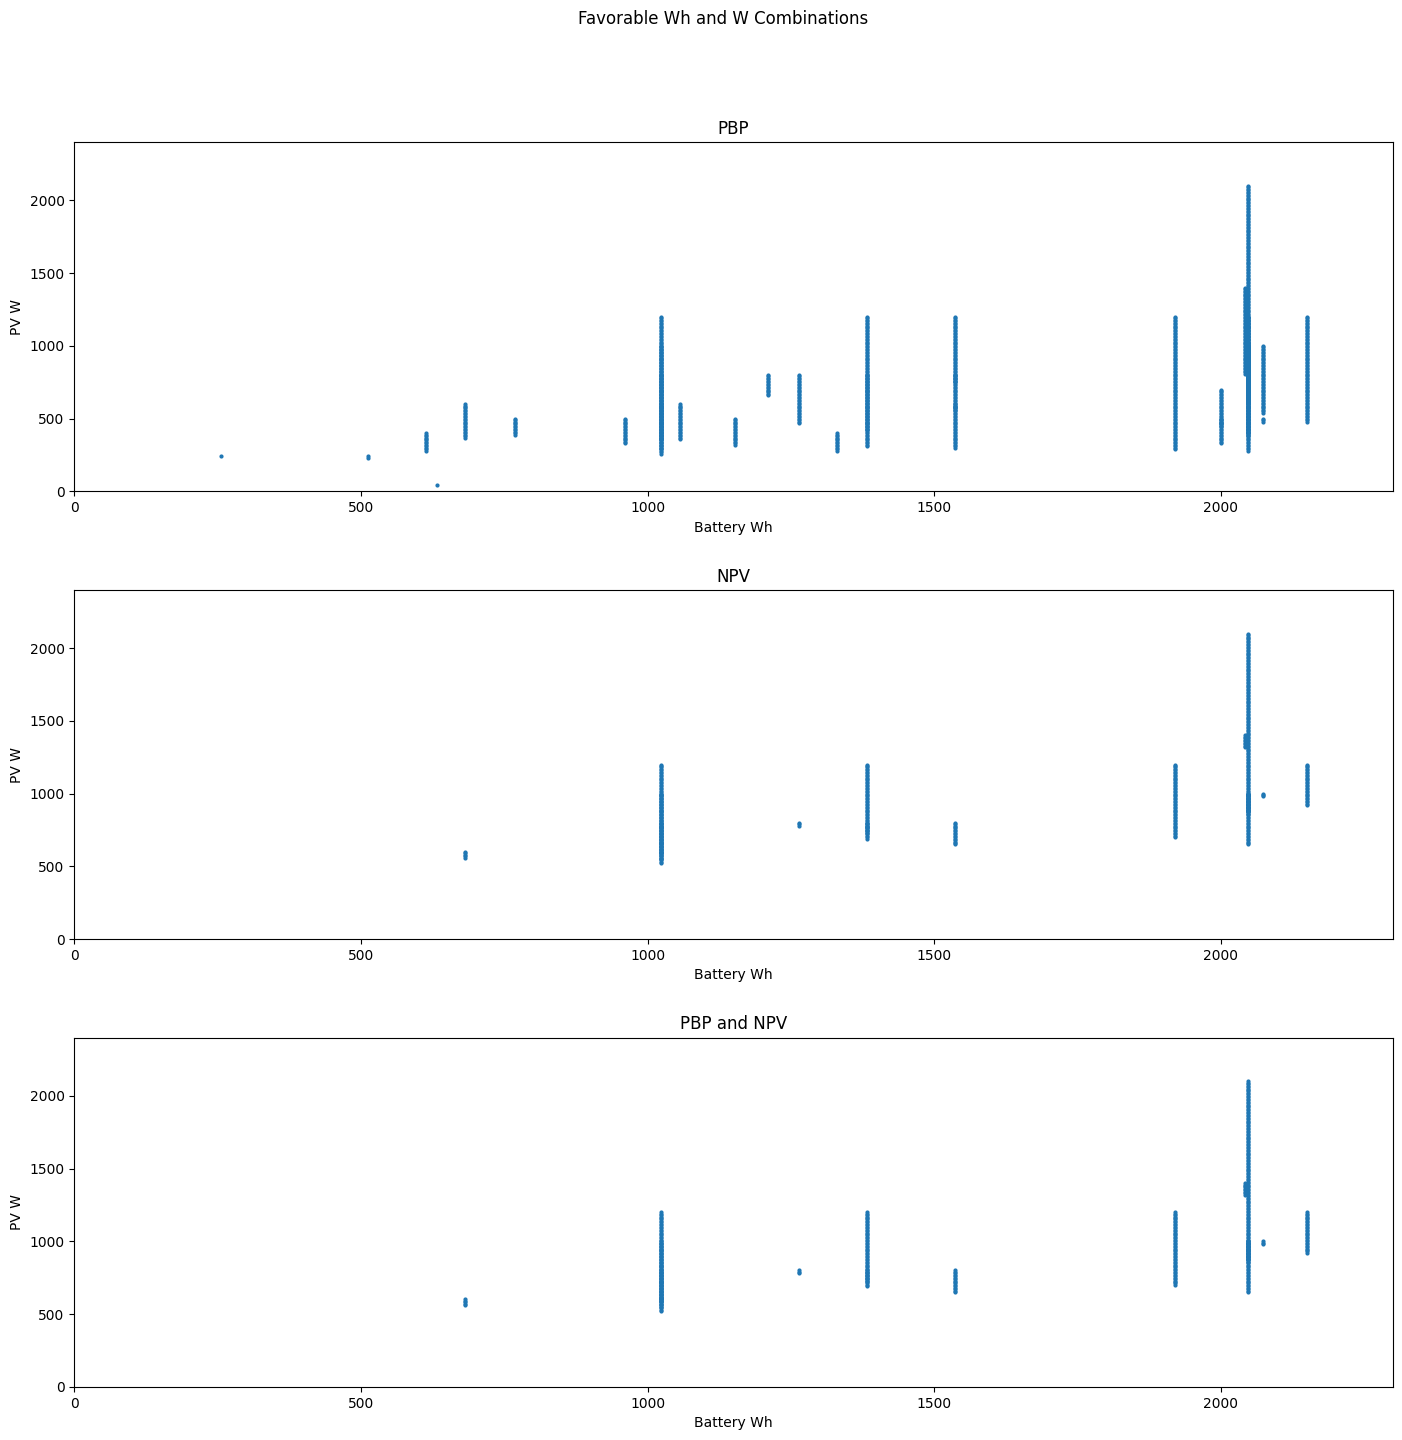

In [249]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15, 15))#plt.figure(figsize=(15, 3), layout='constrained')
fig.suptitle("Favorable Wh and W Combinations")
fig.tight_layout(pad=5.0)
xlim = [00,2300]
ylim = [0,2400]

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.scatter(favPBP_df['batWh'],favPBP_df['pvW'], s=4)
ax1.set_xlabel('Battery Wh')
ax1.set_ylabel('PV W')
ax1.set_title('PBP')

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.scatter(favNPV_df['batWh'],favNPV_df['pvW'], s=4)
ax2.set_xlabel('Battery Wh')
ax2.set_ylabel('PV W')
ax2.set_title('NPV')

ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.scatter(fav_df['batWh'],fav_df['pvW'],s=4)
ax3.set_xlabel('Battery Wh')
ax3.set_ylabel('PV W')
ax3.set_title('PBP and NPV')


In [238]:
print(favPBP_df['batModel'].unique())
print(favNPV_df['batModel'].unique())
print(fav_df['batModel'].unique())


['Explorer 600 Plus' 'Explorer 700 Plus' 'Explorer 1000 Plus'
 'Explorer 2000 Plus' 'E600LFP' 'E1000LFP' 'E1500LFP Expandable'
 'E2000LFP Expandable' 'E3600LFP' 'AC70' 'AC180' 'AC200P' 'AC200L' 'AC240'
 'Elite 200V2' 'DELTA 2 Max' 'DELTA 3 Plus' 'HomePower One Pro'
 'SOLIX C1000' 'SOLIX F1500' 'SOLIX F2000 PowerHouse 767' 'Exodus 600'
 'Exodus 600 Plus' 'Mega 1' 'Mega 2' 'Mega 3' 'ST2000' 'DBS1000 Pro'
 'DBS1300' 'DBS1400 Pro' 'DBS2100 Pro' 'DBS2300' 'DBS2300 Plus '
 'INFINITY 1300' 'INFINITY 2000' 'HELIOS 3600' 'P1201' 'P2001' 'BP2000']
['Explorer 700 Plus' 'Explorer 1000 Plus' 'Explorer 2000 Plus' 'E1000LFP'
 'E1500LFP Expandable' 'E2000LFP Expandable' 'E3600LFP' 'Elite 200V2'
 'DELTA 3 Plus' 'Mega 1' 'Mega 2' 'Mega 3' 'DBS1000 Pro' 'DBS1400 Pro'
 'DBS2100 Pro' 'DBS2300 Plus ' 'INFINITY 1300' 'INFINITY 2000'
 'HELIOS 3600' 'BP2000']
['Explorer 700 Plus' 'Explorer 1000 Plus' 'Explorer 2000 Plus' 'E1000LFP'
 'E1500LFP Expandable' 'E2000LFP Expandable' 'E3600LFP' 'Elite 200V2'
 'DELTA 3

In [240]:
print(favPBP_df['pvW'].unique())
print(favNPV_df['pvW'].unique())
print(fav_df['pvW'].unique())

[  40  370  380  390  400  410  420  430  440  450  460  470  480  490
  500  510  520  530  540  550  560  570  580  590  600  610  620  630
  640  650  660  670  680  690  700  710  720  730  740  750  760  770
  780  790  800  810  820  830  840  850  860  870  880  890  900  910
  920  930  940  950  960  970  980  990 1000 1010 1020 1030 1040 1050
 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190
 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330
 1340 1350 1360 1370 1380 1390 1400  280  290  300  310  320  330  340
  350  360  260  270 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500
 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640
 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780
 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920
 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060
 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200
 2210 

## Filtering to Favorable ROIs

In [241]:
favPBP_df_Z = favPBP_df[favPBP_df['immediateEventAmt'] == 0] 
favPBP_df_O = favPBP_df[favPBP_df['immediateEventAmt'] == 1] 
favPBP_df_F = favPBP_df[favPBP_df['immediateEventAmt'] == 5] 

In [242]:
#get list of battery sizes
favBatWh = list(favPBP_df['batWh'].unique())
favBatWh

[np.float64(632.0),
 np.float64(680.96),
 np.float64(1264.64),
 np.float64(2042.8),
 np.float64(614.0),
 np.float64(1024.0),
 np.float64(1536.0),
 np.float64(1920.0),
 np.float64(3072.0),
 np.float64(768.0),
 np.float64(1152.0),
 np.float64(2000.0),
 np.float64(2048.0),
 np.float64(2073.0),
 np.float64(1210.0),
 np.float64(1056.0),
 np.float64(256.0),
 np.float64(512.0),
 np.float64(1330.0),
 np.float64(1382.0),
 np.float64(2150.0),
 np.float64(2330.0),
 np.float64(3686.0),
 np.float64(960.0)]

In [243]:
#get total combinations by azimuth, frequency, and network

print('Total Combinations')
print(str(favPBP_df.shape[0])+ ' total favorable ROI hardware combinations generated')
print(str(favPBP_df_Z.shape[0])+ ' total favorable ROI hardware combinations generated - Zero Immediate Event')
print(str(favPBP_df_O.shape[0])+ ' total favorable ROI hardware combinations generated - One Immediate Event')
print(str(favPBP_df_F.shape[0])+ ' total favorable ROI hardware combinations generated - Five Immediate Event')
print('')

print('Eastern')
print(str(favPBP_df[favPBP_df['az']==110].shape[0])+ ' eastern favorable ROI hardware combinations generated')
print(str(favPBP_df_Z[favPBP_df_Z['az']==110].shape[0])+ ' eastern favorable ROI hardware combinations generated - Zero Immediate Event')
print(str(favPBP_df_O[favPBP_df_O['az']==110].shape[0])+ ' eastern favorable ROI hardware combinations generated - One Immediate Event')
print(str(favPBP_df_F[favPBP_df_F['az']==110].shape[0])+ ' eastern favorable ROI hardware combinations generated - Five Immediate Event')
print('Impact: ' + str(favPBP_df_Z[favPBP_df_Z['az']==110].shape[0]/favPBP_df_F[favPBP_df_F['az']==110].shape[0])) #the closer to 1, the less impactful
print('')

print('Southern')
print(str(favPBP_df[favPBP_df['az']==180].shape[0])+ ' southern favorable ROI hardware combinations generated')
print(str(favPBP_df_Z[favPBP_df_Z['az']==180].shape[0])+ ' southern favorable ROI hardware combinations generated - Zero Immediate Event')
print(str(favPBP_df_O[favPBP_df_O['az']==180].shape[0])+ ' southern favorable ROI hardware combinations generated - One Immediate Event')
print(str(favPBP_df_F[favPBP_df_F['az']==180].shape[0])+ ' southern favorable ROI hardware combinations generated - Five Immediate Event')
print('Impact: ' + str(favPBP_df_Z[favPBP_df_Z['az']==180].shape[0]/favPBP_df_F[favPBP_df_F['az']==180].shape[0])) #the closer to 1, the less impactful
print('')

print('Western')
print(str(favPBP_df[favPBP_df['az']==250].shape[0])+ ' western favorable ROI hardware combinations generated')
print(str(favPBP_df_Z[favPBP_df_Z['az']==250].shape[0])+ ' western favorable ROI hardware combinations generated - Zero Immediate Event')
print(str(favPBP_df_O[favPBP_df_O['az']==250].shape[0])+ ' western favorable ROI hardware combinations generated - One Immediate Event')
print(str(favPBP_df_F[favPBP_df_F['az']==250].shape[0])+ ' western favorable ROI hardware combinations generated - Five Immediate Event')
print('Impact: ' + str(favPBP_df_Z[favPBP_df_Z['az']==250].shape[0]/favPBP_df_F[favPBP_df_F['az']==250].shape[0])) #the closer to 1, the less impactful


Total Combinations
2091 total favorable ROI hardware combinations generated
2091 total favorable ROI hardware combinations generated - Zero Immediate Event
0 total favorable ROI hardware combinations generated - One Immediate Event
0 total favorable ROI hardware combinations generated - Five Immediate Event

Eastern
0 eastern favorable ROI hardware combinations generated
0 eastern favorable ROI hardware combinations generated - Zero Immediate Event
0 eastern favorable ROI hardware combinations generated - One Immediate Event
0 eastern favorable ROI hardware combinations generated - Five Immediate Event


ZeroDivisionError: division by zero

In [244]:
for n in myNetworks:
    print('Network: ' + n)
    tempDF = favPBP_df[favPBP_df['network']==n]

    tempDF_Z = tempDF[tempDF['immediateEventAmt'] == 0]
    tempDF_O = tempDF[tempDF['immediateEventAmt'] == 1]
    tempDF_F = tempDF[tempDF['immediateEventAmt'] == 5]

    print('Total Combinations')
    print(str(tempDF.shape[0])+ ' total favorable ROI hardware combinations generated')
    print(str(tempDF_Z.shape[0])+ ' total favorable ROI hardware combinations generated - Zero Immediate Event')
    print(str(tempDF_O.shape[0])+ ' total favorable ROI hardware combinations generated - One Immediate Event')
    print(str(tempDF_F.shape[0])+ ' total favorable ROI hardware combinations generated - Five Immediate Event')
    print('Impact: ' + str(tempDF_Z.shape[0]/tempDF_F.shape[0])) #the closer to 1, the less impactful
    
    print('')

Network: bowling green
Total Combinations
2091 total favorable ROI hardware combinations generated
2091 total favorable ROI hardware combinations generated - Zero Immediate Event
0 total favorable ROI hardware combinations generated - One Immediate Event
0 total favorable ROI hardware combinations generated - Five Immediate Event


ZeroDivisionError: division by zero

In [186]:
#network combos by azimuth
print("Network combos by azimuth - Zero Immediate Event")
for n in myNetworks:
    print('Network: ' + n)
    tempDF = favPBP_df[favPBP_df['network']==n]
    tempDF_Z = tempDF[tempDF['immediateEventAmt'] == 0]

    for a in [110,180,250]:
        print('Azimuth ' + str(a) + ": " + str(tempDF_Z[tempDF_Z['az']==a].shape[0])+ ' total favorable ROI hardware combinations generated')
    print('')

Network combos by azimuth - Zero Immediate Event
Network: bowling green
Azimuth 110: 0 total favorable ROI hardware combinations generated
Azimuth 180: 3193 total favorable ROI hardware combinations generated
Azimuth 250: 0 total favorable ROI hardware combinations generated

Network: long island city
Azimuth 110: 0 total favorable ROI hardware combinations generated
Azimuth 180: 0 total favorable ROI hardware combinations generated
Azimuth 250: 0 total favorable ROI hardware combinations generated

Network: sunnyside
Azimuth 110: 0 total favorable ROI hardware combinations generated
Azimuth 180: 0 total favorable ROI hardware combinations generated
Azimuth 250: 0 total favorable ROI hardware combinations generated

Network: crown heights
Azimuth 110: 0 total favorable ROI hardware combinations generated
Azimuth 180: 0 total favorable ROI hardware combinations generated
Azimuth 250: 0 total favorable ROI hardware combinations generated

Network: grasslands
Azimuth 110: 0 total favorabl

In [187]:
#median performance

print('Median DR Performance - Watts')
print('')

print(str(favPBP_df['avgMAPw_C'].median())+ ' Median CSRP - Total')
print(str(favPBP_df['avgMAPw_D'].median())+ ' Median DRLP - Total')
print(str(favPBP_df_Z['avgMAPw_C'].median())+ ' Median CSRP - Zero')
print(str(favPBP_df_Z['avgMAPw_D'].median())+ ' Median DRLP - Zero')
print(str(favPBP_df_O['avgMAPw_C'].median())+ ' Median CSRP - One')
print(str(favPBP_df_O['avgMAPw_D'].median())+ ' Median DRLP - One')
print(str(favPBP_df_F['avgMAPw_C'].median())+ ' Median CSRP - Five')
print(str(favPBP_df_F['avgMAPw_D'].median())+ ' Median DRLP - Five')

for a in [110,180,250]:
    print('')
    print(str(a) + ' degrees')
    print('DRLP')
    #print(str(favPBP_df[favPBP_df['az']==a]['avgMAPw_D'].median())+ ' eastern favorable ROI hardware combinations generated')
    print(str(favPBP_df_Z[favPBP_df_Z['az']==a]['avgMAPw_D'].median())+ ' DLRP Median Performance - Zero Immediate Event')
    print(str(favPBP_df_O[favPBP_df_O['az']==a]['avgMAPw_D'].median())+ ' DLRP Median Performance - One Immediate Event')
    print(str(favPBP_df_F[favPBP_df_F['az']==a]['avgMAPw_D'].median())+ ' DLRP Median Performance - Five Immediate Event')
    print('CSRP')
    #print(str(favPBP_df[favPBP_df['az']==a]['avgMAPw_C'].median())+ ' eastern favorable ROI hardware combinations generated')
    print(str(favPBP_df_Z[favPBP_df_Z['az']==a]['avgMAPw_C'].median())+ ' CRSP Median Performance - Zero Immediate Event')
    print(str(favPBP_df_O[favPBP_df_O['az']==a]['avgMAPw_C'].median())+ ' CRSP - One Immediate Event')
    print(str(favPBP_df_F[favPBP_df_F['az']==a]['avgMAPw_C'].median())+ ' CRSP - Five Immediate Event')

Median DR Performance - Watts

3995.435259701751 Median CSRP - Total
1999.9999999999995 Median DRLP - Total
3995.435259701751 Median CSRP - Zero
1999.9999999999995 Median DRLP - Zero
nan Median CSRP - One
nan Median DRLP - One
nan Median CSRP - Five
nan Median DRLP - Five

110 degrees
DRLP
nan DLRP Median Performance - Zero Immediate Event
nan DLRP Median Performance - One Immediate Event
nan DLRP Median Performance - Five Immediate Event
CSRP
nan CRSP Median Performance - Zero Immediate Event
nan CRSP - One Immediate Event
nan CRSP - Five Immediate Event

180 degrees
DRLP
1999.9999999999995 DLRP Median Performance - Zero Immediate Event
nan DLRP Median Performance - One Immediate Event
nan DLRP Median Performance - Five Immediate Event
CSRP
3995.435259701751 CRSP Median Performance - Zero Immediate Event
nan CRSP - One Immediate Event
nan CRSP - Five Immediate Event

250 degrees
DRLP
nan DLRP Median Performance - Zero Immediate Event
nan DLRP Median Performance - One Immediate Event
n

In [188]:
favPBP_df_Z[favPBP_df_Z['realPayback']<8.1].shape[0]/favPBP_df_Z.shape[0]

0.9990604447228312

In [189]:
favPBP_df[favPBP_df['realPayback']<8.1].shape[0]/favPBP_df.shape[0]

0.9990604447228312

In [142]:
#PBP data

#arg: results DF
def snapShot(rDF):
    print('Amount of systems: ' +str(rDF.shape[0]))
    print('')
    
    #lifespan
    print("Min Lifespan: " + str(min(rDF['lifespan'])))
    print("Mean Lifespan: " + str(rDF['lifespan'].mean()))
    print("Median Lifespan: " + str(rDF['lifespan'].median()))
    print("Max Lifespan: " + str(max(rDF['lifespan'])))
    print('')

    #working life
    print("Min working life: " + str(min(rDF['workingLife'])))
    print("Mean working life: " + str(rDF['workingLife'].mean()))
    print("Median working life: " + str(rDF['workingLife'].median()))
    print("Max working life: " + str(max(rDF['workingLife'])))
    print('')
    
    # fastest PBP
    fAPBP = rDF[rDF['realPayback'] == min(rDF['realPayback'])]
    print("Fastest PBP: " + str(fAPBP['realPayback'].iloc[0]) + "yrs")

    mAPBP = rDF['realPayback'].mean()
    print("Mean PBP: " + str(mAPBP))
    
    print("Median PBP: " + str(rDF['realPayback'].median()))
    # slowest PBP
    sAPBP = rDF[rDF['realPayback'] == max(rDF['realPayback'])]
    print("Slowest PBP: " + str(sAPBP['realPayback'].iloc[0]) + "yrs")

    print('')

    # Income After ROI
    maxAIAP = rDF[rDF['incomeAfterPBP'] == max(rDF['incomeAfterPBP'])]
    print("Greatest IAP: $" + str(maxAIAP['incomeAfterPBP'].iloc[0]) + " ($" + str(maxAIAP['iapSplit'].iloc[0]) + '/per year for '+ str(min(10,maxAIAP['lifespan'].iloc[0])) +' years)')

    mAIPBP = rDF['incomeAfterPBP'].mean()
    print("Mean PBP: " + str(mAIRoi))

    print("Median IAP: " + str(rDF['incomeAfterRoi'].median()))
    
    minAIAP = rDF[rDF['incomeAfterRoi'] == min(rDF['incomeAfterRoi'])]
    print("Lowest IAP: $" + str(minAIAP['incomeAfterRoi'].iloc[0]) + " ($" + str(minAIAP['iapSplit'].iloc[0]) + '/per year for '+ str(min(10,minAIAP['lifespan'].iloc[0])) +' years)')

    print('')
    
    # Income After ROI Split
    print("Greatest IAP Split: $" + str(max(rDF['iapSplit'])))

    print("Mean IAP Split: " + str(rDF['iapSplit'].mean()))
    print("Median IAP Split: " + str(rDF['iapSplit'].median()))

    print("Lowest IAP Split: $" + str(min(rDF['iapSplit'])))

    print('')
    
    #min PV
    md = rDF[rDF['pvW'] == min(rDF['pvW'])]
    a = []
    for i, r in md.iterrows():
        m = [r['pvW'],r['batWh']]
        a.append(str(m))
    print("Combinations with Minimum PV Arrays: ")
    print(set(a))
    
    #max PV
    md = rDF[rDF['pvW'] == max(rDF['pvW'])]
    a = []
    for i, r in md.iterrows():
        m = [r['pvW'],r['batWh']]
        a.append(str(m))
    print("Combinations with Maximum PV Arrays: ")
    print(set(a))  
    
    print("mean PV: " + str(rDF['pvW'].mean()))
    print("median PV: " + str(rDF['pvW'].median()))

    print('')

    #min BAT
    md = rDF[rDF['batWh'] == min(rDF['batWh'])]
    a = []
    for i, r in md.iterrows():
        m = [r['pvW'],r['batWh']]
        a.append(str(m))
    print("Combinations with Minimum Bat Wh: ")
    print(set(a))
    
    #max BAT
    md = rDF[rDF['batWh'] == max(rDF['batWh'])]
    a = []
    for i, r in md.iterrows():
        m = [r['pvW'],r['batWh']]
        a.append(str(m))
    print("Combinations with Maximum Bat Wh: ")
    print(set(a))  

    print("mean Bat Wh: " + str(rDF['batWh'].mean()))
    print("median Bat Wh: " + str(rDF['batWh'].median()))
    print('')

    #min BATAC
    md = rDF[rDF['batWhAC'] == min(rDF['batWhAC'])]
    a = []
    for i, r in md.iterrows():
        m = [r['pvW'],r['batWhAC']]
        a.append(str(m))
    print("Combinations with Minimum Bat Wh AC: ")
    print(set(a))
    

    #max BATAC
    md = rDF[rDF['batWhAC'] == max(rDF['batWhAC'])]
    a = []
    for i, r in md.iterrows():
        m = [r['pvW'],r['batWhAC']]
        a.append(str(m))
    print("Combinations with Maximum Bat Wh AC: ")
    print(set(a))  

    print("mean Bat Wh AC: " + str(rDF['batWhAC'].mean()))
    print("median Bat Wh AC: " + str(rDF['batWhAC'].median()))

    print('')

    #CSRP performance
    print("Min CSRP W Performance: " + str(round(min(rDF['avgMAPw_C']),2)))
    print("Mean CSRP W Performance: " + str(round(rDF['avgMAPw_C'].mean(),2)))
    print("Median CSRP W Performance: " + str(round(rDF['avgMAPw_C'].median(),2)))
    print("Max CSRP W Performance: " + str(round(max(rDF['avgMAPw_C']),2)))

    print('')

    #DLRP performance
    print("Min DLRP W Performance: " + str(round(min(rDF['avgMAPw_D']),2)))
    print("Mean DLRP W Performance: " + str(round(rDF['avgMAPw_D'].mean(),2)))
    print("Median DLRP W Performance: " + str(round(rDF['avgMAPw_D'].median(),2)))
    print("Max DLRP W Performance: " + str(round(max(rDF['avgMAPw_D']),2)))
    
    print('')
    
    #Total DR inc
    #Sums the average annual income for reservation and performance payments for a given system
    # ['drIncAnnual_D'].apply(lambda x: mean(x))),
    incL = []
    for i, r in rDF[['drIncAnnual_C','drIncAnnual_D','drPerformanceIncome']].iterrows():
        l = len(r['drIncAnnual_C'])
        incL.append((sum(r['drIncAnnual_C']) + sum(r['drIncAnnual_D']) + sum(r['drPerformanceIncome']))/l)
    
    rDF['totalDR_AnnualAvgInc'] = incL
    #display(rDF['totalDR_AnnualAvgInc'].head())
    print('Min Avg Annual DR Income: ' + str(round(min(rDF['totalDR_AnnualAvgInc']),2)))
    print('Mean Avg Annual DR Income: ' + str(round(rDF['totalDR_AnnualAvgInc'].mean(),2)))
    print('Median Avg Annual DR Income: ' + str(round(rDF['totalDR_AnnualAvgInc'].median(),2)))
    print('Max Avg Annual DR Income: ' + str(round(max(rDF['totalDR_AnnualAvgInc']),2)))
    
    print('')
    avgAnnBene = rDF['annualBenefit'].apply(lambda x: mean(x))
    print('Min Avg Annual Econ Benefits: ' + str(round(min(avgAnnBene),2)))
    print('Mean Avg Annual Econ Benefits: ' + str(round(avgAnnBene.mean(),2)))
    print('Median Avg Annual Econ Benefits: ' + str(round(avgAnnBene.median(),2)))
    print('Max Avg Annual Econ Benefits: ' + str(round(max(avgAnnBene),2)))
    
    print('')
    #percentage of annual benefit contributed by DR
    drPercentOfAnnBene = incL/avgAnnBene
    print('Min % of Annual Benefits Contributed by DR: ' + str(round(min(drPercentOfAnnBene),2)))
    print('Mean % of Annual Benefits Contributed by DR: ' + str(round(drPercentOfAnnBene.mean(),2)))
    print('Median % of Annual Benefits Contributed by DR: ' + str(round(drPercentOfAnnBene.median(),2)))
    print('Max % of Annual Benefits Contributed by Dr: ' + str(round(max(drPercentOfAnnBene),2)))

    print('')
    maxDailyPVWAC = rDF['dailyPVWAC_4M'].apply(lambda x: list(x)[1])
    print('Min Maximum Daily PV WAC: ' + str(min(maxDailyPVWAC)))
    print('Max Maximum Daily PV WAC: ' + str(max(maxDailyPVWAC)))
    print('Mean Maximum Daily PV WAC: ' + str(mean(maxDailyPVWAC)))
    print('Median Maximum Daily PV WAC: ' + str(median(maxDailyPVWAC)))



In [143]:
snapShot(favPBP_df_Z)

Amount of systems: 4415

Min Lifespan: 6.849315068493151
Mean Lifespan: 9.886780744349121
Median Lifespan: 9.58904109589041
Max Lifespan: 16.438356164383563

Min working life: 6.849315068493151
Mean working life: 9.304488124234009
Median working life: 9.58904109589041
Max working life: 10.0

Fastest PBP: 0.5833333333333334yrs
Mean PBP: 1.6189127972819932
Median PBP: 1.4166666666666667
Slowest PBP: 8.75yrs



KeyError: 'incomeAfterPBP'

In [144]:
#compare DR income against some minimum dollar amount
def compareDRinc(rDF,minDR = 25):
    #Sums the average annual income for reservation and performance payments for a given system
    # ['drIncAnnual_D'].apply(lambda x: mean(x))),
    incL = []
    for i, r in rDF[['drIncAnnual_C','drIncAnnual_D','drPerformanceIncome']].iterrows():
        l = len(r['drIncAnnual_C'])
        incL.append((sum(r['drIncAnnual_C']) + sum(r['drIncAnnual_D']) + sum(r['drPerformanceIncome']))/l)
    
    rDF['totalDR_AnnualAvgInc'] = incL
    
    rDF_compare = rDF[rDF['totalDR_AnnualAvgInc']>=minDR]
    print('Percentage of favorable results above min: ' + str(rDF_compare.shape[0]/rDF.shape[0]))

compareDRinc(favPBP_df_Z)

Percentage of favorable results above min: 1.0


In [145]:
favPBP_df_Z.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'LCOSS', 'NPV',
       'realPayback', 'Cycles', 'lifespan', 'workingLife',
       'totalDR_AnnualAvgInc'],
      dtype='object')

In [146]:
#snap shot for systems with best CSRP performance 
#snapShot(favPBP_df_Z[favPBP_df_Z['avgMAPw_C']>=450])

#snap shot for systems with best CSRP performance 
#snapShot(favPBP_df_Z[favPBP_df_Z['avgMAPw_D']>=300])

#snap shot for systems with smallest arrays 
snapShot(favPBP_df_Z[favPBP_df_Z['pvW']<=270])

#snap shot for systems with best IAP
#snapShot(favPBP_df_Z[favPBP_df_Z['incomeAfterRoi']>=400])

Amount of systems: 1562

Min Lifespan: 6.849315068493151
Mean Lifespan: 9.539578692578885
Median Lifespan: 9.58904109589041
Max Lifespan: 16.438356164383563

Min working life: 6.849315068493151
Mean working life: 9.097661936751265
Median working life: 9.58904109589041
Max working life: 10.0

Fastest PBP: 0.75yrs
Mean PBP: 2.359314980793854
Median PBP: 1.8333333333333333
Slowest PBP: 8.75yrs



KeyError: 'incomeAfterPBP'

In [147]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favPBP_df_Z['realPayback'], bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Hardware With Favorable ROI Histogram') 
plt.xlabel('ROI Years') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Figure size 1400x700 with 0 Axes>

C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3348588561.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


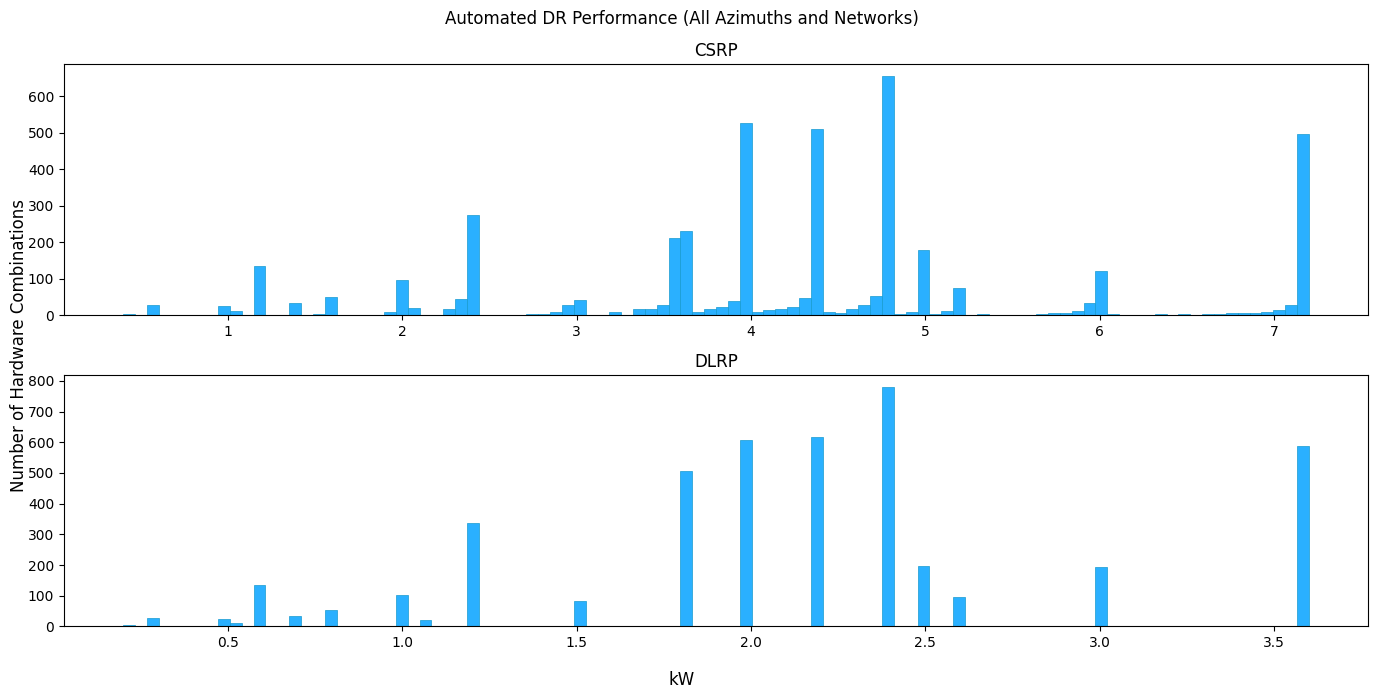

In [148]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 7))
fig.suptitle('Automated DR Performance (All Azimuths and Networks)') 

ax1.hist(favPBP_df_Z['avgMAPw_C'] *0.001, bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax1.set_title("CSRP")
ax2.hist(favPBP_df_Z['avgMAPw_D'] *0.001, bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax2.set_title("DLRP")

#ax1.set(xlabel='kW',ylabel="Number of Hardware Combinations")
#ax2.set(xlabel='kW',ylabel="Number of Hardware Combinations")

fig.supxlabel('kW')
fig.supylabel('Number of Hardware Combinations')

#fig.set(ylabel='Number of Hardware Combinations')

fig.subplots_adjust(bottom=0, top=1.5)

fig.tight_layout(pad=1.0)
#fig.style.use('seaborn-whitegrid') # nice and clean grid
#ax1.xlabel('Max Auto kW') 
fig.show()


<Axes: title={'center': 'Hardware Combinations'}, xlabel='Battery Wh', ylabel='PV Array W'>

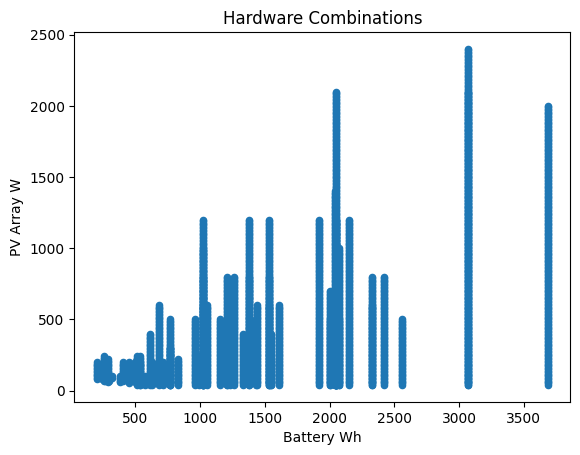

In [82]:
#hardare combos
favPBP_df_Z.plot(kind = 'scatter', x = 'batWh', y = 'pvW',title='Hardware Combinations',xlabel="Battery Wh",ylabel="PV Array W")


# Analysis

To analize:
* impact of network characteristics
* time and overall quantity
* relationship between azimuth and time

## Overall - Zero Immediate Events

* Fastest ROI
* Greatest IAP
* Greatest DR impact
* Greatest PV generation DC
* Greatest avoided grid energy

In [83]:
snapShot(favPBP_df_Z)

Amount of systems: 4479

Min Lifespan: 6.849315068493151
Mean Lifespan: 9.882832212425106
Median Lifespan: 9.58904109589041
Max Lifespan: 16.438356164383563

Min working life: 6.849315068493151
Mean working life: 9.308645826643055
Median working life: 9.58904109589041
Max working life: 10.0

Fastest PBP: 0.5833333333333334yrs
Mean PBP: 1.607092356924909
Median PBP: 1.4166666666666667
Slowest PBP: 8.75yrs



KeyError: 'incomeAfterPBP'

In [84]:
print('Amount with 0 IAP: ' + str(favPBP_df_Z[favPBP_df_Z['incomeAfterRoi'] == 0].shape[0]))
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favPBP_df_Z['incomeAfterRoi'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Income After ROI') 
plt.xlabel('IAP $') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

KeyError: 'incomeAfterRoi'

ValueError: s must be a scalar, or float array-like with the same size as x and y

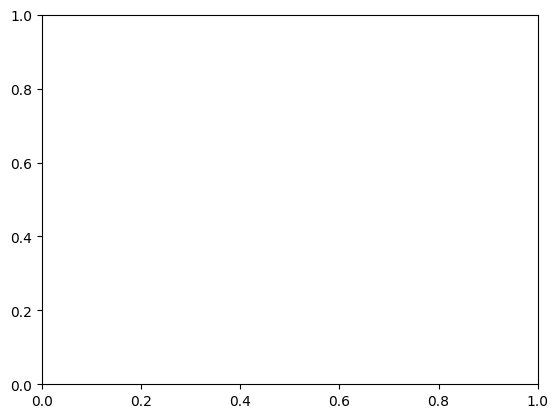

In [85]:
favPBP_df_Z.plot(kind = 'scatter', x = 'batWh', y = 'pvW', c='iapSplit',s='incomeAfterRoi',colormap='viridis',edgecolor='black', title='Hardware')


In [ ]:
# High IAP

highIAP = favPBP_df_Z[favPBP_df_Z['incomeAfterRoi'] >= 300]

highIAP.plot(kind = 'scatter', x = 'batWh', y = 'pvW', c='iapSplit',s='incomeAfterRoi',colormap='viridis',edgecolor='black', title='Hardware w/ IAP >= $300')

# plt.figure(figsize=(14,7)) # Make it 14x7 inch
# plt.style.use('seaborn-whitegrid') # nice and clean grid
# plt.hist(highIAP['incomeAfterRoi'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Income After ROI ($0 IAP not shown)') 
# plt.xlabel('IAP $') 
# plt.ylabel('Number of Hardware Combinations') 
# plt.show()

In [86]:
#levelized cost compaprison
#https://www.statista.com/statistics/493797/estimated-levelized-cost-of-energy-generation-in-the-us-by-technology/
#2023 commercial solar + store lcoe: $46-102/ per megawatts

# Load Alignment

How do the systems that result from the model match the static loads?

In [67]:
#min, max, mean, median
#favPBP_df_Z['dailyPVWAC_4M']

maxPVWAC = []
for m in range(favPBP_df_Z.shape[0]):
    maxPVWAC.append(favPBP_df_Z['dailyPVWAC_4M'].iloc[m][1])

favPBP_df_Z['dailyPVWAC_4M_MAX'] = maxPVWAC

print("percentage of systems under fridge threshold: " + str(favPBP_df_Z[favPBP_df_Z['dailyPVWAC_4M_MAX']<=2400].shape[0]/favPBP_df_Z.shape[0]))

#favPBP_df_Z[favPBP_df_Z['dailyPVWAC_4M_MAX']>2400]

percentage of systems under fridge threshold: 0.11951062459755313


In [68]:
noCurtailment_df = favPBP_df_Z[favPBP_df_Z['dailyPVWAC_4M_MAX']<=2400]

snapShot(noCurtailment_df)

Amount of systems: 928

Min Lifespan: 8.219178082191782
Mean Lifespan: 9.693847425602268
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 8.219178082191782
Mean working life: 9.411608408124705
Median working life: 9.58904109589041
Max working life: 10.0

Fastest PBP: 6.666666666666667yrs
Mean PBP: 8.781519396551724
Median PBP: 8.833333333333334
Slowest PBP: 10.0yrs



KeyError: 'incomeAfterPBP'

In [69]:
snapShot(favPBP_df_Z[favPBP_df_Z['dailyPVWAC_4M_MAX']>2400])

Amount of systems: 6837

Min Lifespan: 8.219178082191782
Mean Lifespan: 9.829673753408626
Median Lifespan: 9.58904109589041
Max Lifespan: 16.438356164383563

Min working life: 8.219178082191782
Mean working life: 9.29453156775883
Median working life: 9.58904109589041
Max working life: 10.0

Fastest PBP: 4.5yrs
Mean PBP: 7.370935107990833
Median PBP: 7.5
Slowest PBP: 10.0yrs



KeyError: 'incomeAfterPBP'

## Impact of Network Characteristics

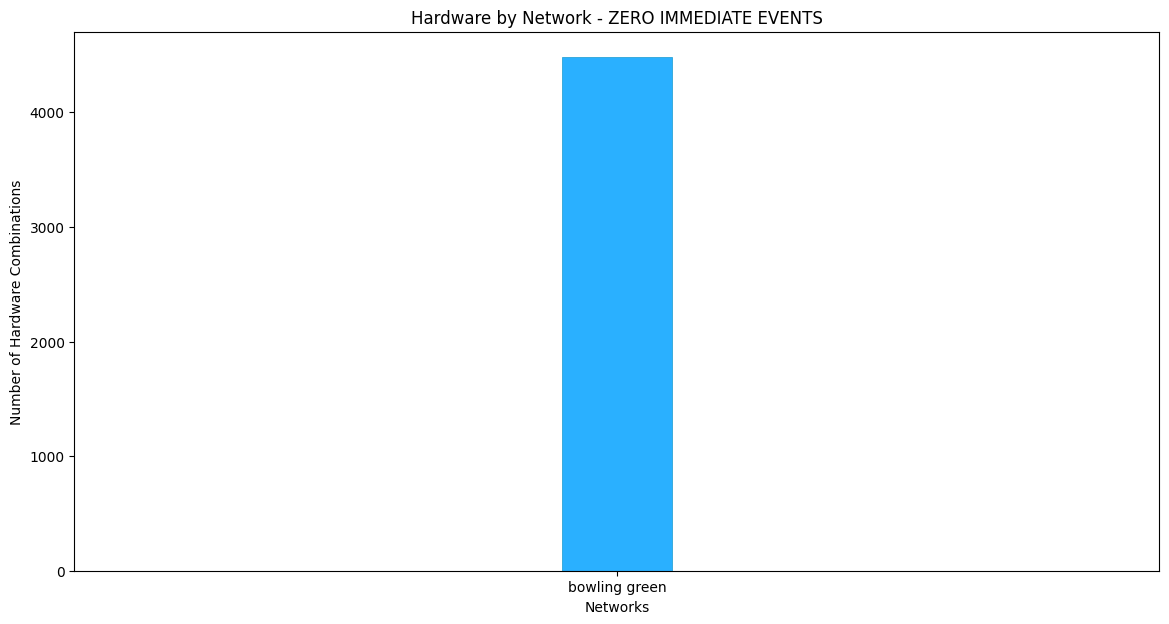

In [88]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(favPBP_df_Z['network'], bins=9, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Hardware by Network - ZERO IMMEDIATE EVENTS') 
plt.xlabel('Networks') 
#plt.xticks(str(favPBP_df_Z['network'])+ ' ' +str(favPBP_df_Z['eventStart']))
plt.ylabel('Number of Hardware Combinations') 
plt.show()

In [89]:
# plt.figure(figsize=(14,7)) # Make it 14x7 inch
# plt.style.use('seaborn-whitegrid') # nice and clean grid
# plt.hist(favPBP_df_O['network'], bins=9, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Hardware by Network - ONE IMMEDIATE EVENTS') 
# plt.xlabel('Networks') 
# #plt.xticks(str(favPBP_df_Z['network'])+ ' ' +str(favPBP_df_Z['eventStart']))
# plt.ylabel('Number of Hardware Combinations') 
# plt.show()

In [90]:
# plt.figure(figsize=(14,7)) # Make it 14x7 inch
# plt.style.use('seaborn-whitegrid') # nice and clean grid
# plt.hist(favPBP_df_F['network'], bins=9, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Hardware by Network - FIVE IMMEDIATE EVENTS') 
# plt.xlabel('Networks') 
# #plt.xticks(str(favPBP_df_Z['network'])+ ' ' +str(favPBP_df_Z['eventStart']))
# plt.ylabel('Number of Hardware Combinations') 
# plt.show()

<Axes: title={'center': 'ROIs'}, xlabel='realPayback', ylabel='eventStart'>

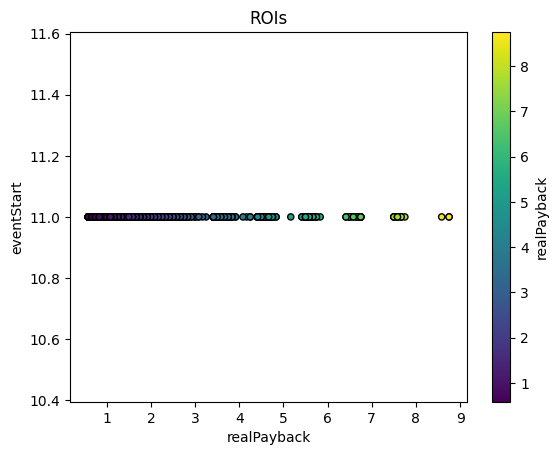

In [91]:
favPBP_df_Z.plot(kind = 'scatter', x = 'realPayback', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='ROIs')


In [94]:
#build a data frame with characteristics by neighborhood

nFavorable = {
    "name":[],
    "total amount":[],
    "start time":[],
    "dr rate $":[],
    "min PV":[],
    "min PV bat Wh":[], #the battery that pairs with the min PV module
    "max PV":[],
    "max PV bat Wh":[], #the battery that pairs with the max PV module
    "min bat":[],
    "min bat PV W":[], #the PV modules that pair with the min battery
    "max bat":[],
    "max bat PV W":[], #the PV modules that pair with the max battery
    "bat models":[],
    "min capex":[],
    "max capex":[],
    #avg capex is kind of meaningless,
    #because lower call times have both cheaper and most expensive system,
    #so just a wider range of possibilities
    "avg capex":[], 
    "min PBP":[],
    "max PBP":[],
    "avg PBP":[],
    "min DR":[],
    "max DR":[],
    "avg DR":[]
}
for n in myNetworks:
    tNAz = favPBP_df_Z[favPBP_df_Z['network'] == n]
    tN = tNAz#[tNAz['az'] == 180] #uncomment to filter by azimuth
    nFavorable['name'].append(n)
    
    nFavorable['start time'].append(getStartTime(n))
    nFavorable['dr rate $'].append(getTotalRate(n))
    
    if tN.shape[0] != 0:
        nFavorable['total amount'].append(tN.shape[0])
    
        #min PV
        tNminMax = tN[tN['pvW'] == min(tN['pvW'])]
        nFavorable['min PV'].append(min(tN['pvW']))
        nFavorable['min PV bat Wh'].append(list(set(tNminMax['batWh'])))

        #max PV
        tNminMax = tN[tN['pvW'] == max(tN['pvW'])]
        nFavorable['max PV'].append(max(tN['pvW']))
        nFavorable['max PV bat Wh'].append(list(set(tNminMax['batWh'])))

        #min BAT
        tNminMax = tN[tN['batWh'] == min(tN['batWh'])]
        nFavorable['min bat'].append(min(tN['batWh']))
        nFavorable['min bat PV W'].append(list(set(tNminMax['pvW'])))

        #max BAT
        tNminMax = tN[tN['batWh'] == max(tN['batWh'])]
        nFavorable['max bat'].append(max(tN['batWh']))
        nFavorable['max bat PV W'].append(list(set(tNminMax['pvW'])))

        nFavorable['bat models'].append(tN['batModel'].unique())
        
        nFavorable['min capex'].append(min(tN['capex']))
        nFavorable['max capex'].append(max(tN['capex']))
        nFavorable['avg capex'].append(tN['capex'].mean())
        nFavorable['min PBP'].append(min(tN['realPayback']))
        nFavorable['max PBP'].append(max(tN['realPayback']))
        nFavorable['avg PBP'].append(tN['realPayback'].mean())

        mDR = []
        for y in range(len(tN['avgAutoParticipationAnnualW_C'])):
            #print(list(tN['avgAutoParticipationAnnualW_C']))
            yC = sum(list(tN['avgAutoParticipationAnnualW_C'])[y])
            yD = sum(list(tN['avgAutoParticipationAnnualW_D'])[y])
            mDR.append(sum([yC,yD])/len(list(tN['avgAutoParticipationAnnualW_C'])[y]))

        nFavorable['min DR'].append(min(mDR))
        nFavorable['max DR'].append(max(mDR))
        nFavorable['avg DR'].append(sum(mDR)/len(mDR))
    else:
        for k in ['total amount','min PV','min PV bat Wh','max PV','max PV bat Wh',
                  'min bat','min bat PV W','max bat','max bat PV W', 'bat models',
                  'min capex','max capex','avg capex','min PBP','max PBP',
                  'avg PBP','min DR','max DR','avg DR']:
            nFavorable[k].append(0)

networkResults_df = pd.DataFrame.from_dict(nFavorable)
display(networkResults_df)

name  total amount  start time  dr rate $  min PV  \
0     bowling green          4479          11         36      40   
1  long island city             0          14         36       0   
2         sunnyside             0          16         36       0   
3     crown heights             0          19         36       0   
4        grasslands             0          14         24       0   
5       fresh kills             0          16         24       0   
6      williamsburg             0          14         43       0   
7   northeast bronx             0          16         43       0   
8         ridgewood             0          19         43       0   

                                       min PV bat Wh  max PV max PV bat Wh  \
0  [1024.0, 1536.0, 1920.0, 3072.0, 768.0, 1152.0...    2400      [3072.0]   
1                                                  0       0             0   
2                                                  0       0             0   
3                                                  0       0             0   
4                                                  0       0             0   
5                                                  0       0             0   
6                                                  0       0             0   
7                                                  0       0             0   
8                                                  0       0             0   

   min bat                                       min bat PV W  ...  \
0    204.0  [160, 130, 100, 200, 170, 140, 110, 80, 180, 1...  ...   
1      0.0                                                  0  ...   
2      0.0                                                  0  ...   
3      0.0                                                  0  ...   
4      0.0                                                  0  ...   
5      0.0                                                  0  ...   
6      0.0                                                  0  ...   
7      0.0                                                  0  ...   
8      0.0                                                  0  ...   

                                          bat models   min capex    max capex  \
0  [Explorer 300 Plus, Explorer 600 Plus, Explore...  378.558375  4551.737125   
1                                                  0    0.000000     0.000000   
2                                                  0    0.000000     0.000000   
3                                                  0    0.000000     0.000000   
4                                                  0    0.000000     0.000000   
5                                                  0    0.000000     0.000000   
6                                                  0    0.000000     0.000000   
7                                                  0    0.000000     0.000000   
8                                                  0    0.000000     0.000000   

     avg capex   min PBP  max PBP   avg PBP      min DR   max DR       avg DR  
0  1947.554875  0.583333     8.75  1.607092  599.989315  10800.0  6547.743876  
1     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
2     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
3     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
4     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
5     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
6     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
7     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  
8     0.000000  0.000000     0.00  0.000000    0.000000      0.0     0.000000  

[9 rows x 22 columns]

In [95]:
#which power station models are viable?
listModels = []

for n in range(networkResults_df.shape[0]):
    listModels.extend(list(networkResults_df.iloc[n]['bat models']))
    
setModels = set(listModels)
print(len(setModels))

modelCount = {}
for m in setModels:
    modelCount[m]= listModels.count(m)
    
display(modelCount)

TypeError: 'int' object is not iterable

In [96]:
modelCount.keys()

NameError: name 'modelCount' is not defined

C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3638453215.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3638453215.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3638453215.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


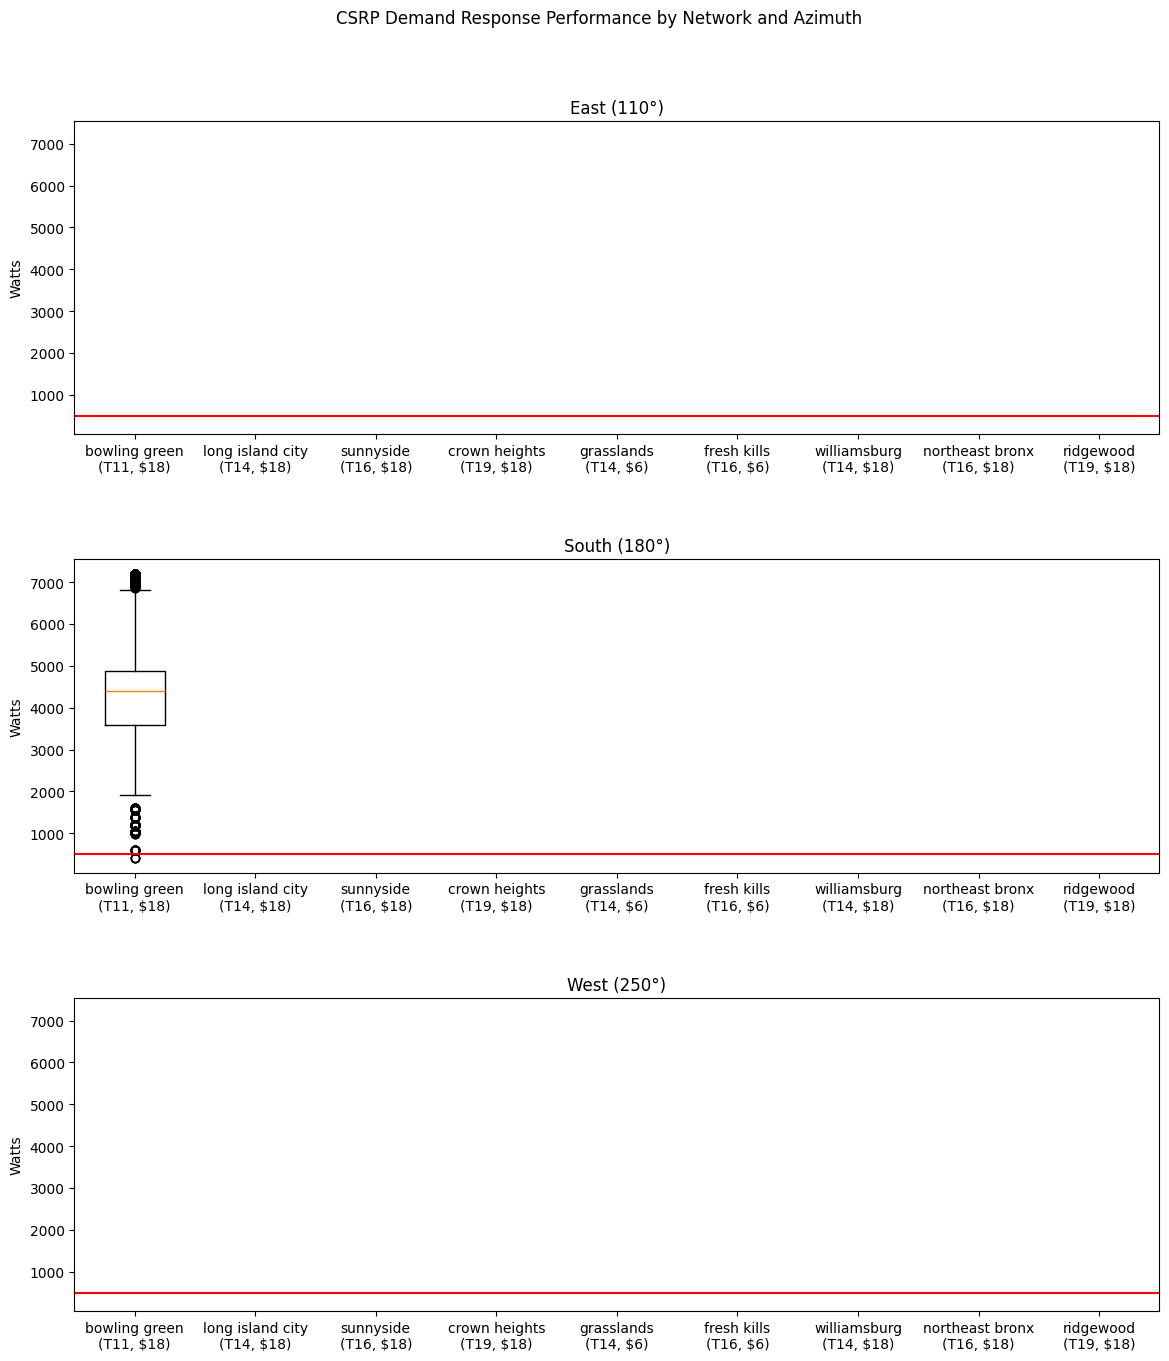

In [97]:
#box plot for DR, ROI, IAP... is there a way to represent a box plot for multidimension data? i.e pairs of PV and Bat specs? 

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['az'] == 180][favPBP_df_Z[favPBP_df_Z['az'] == 180]['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getCSRPrate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['avgMAPw_C']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Watts') 
    axs[a].axhline(500, c='r')

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('CSRP Demand Response Performance by Network and Azimuth')
    
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1615201681.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1615201681.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1615201681.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


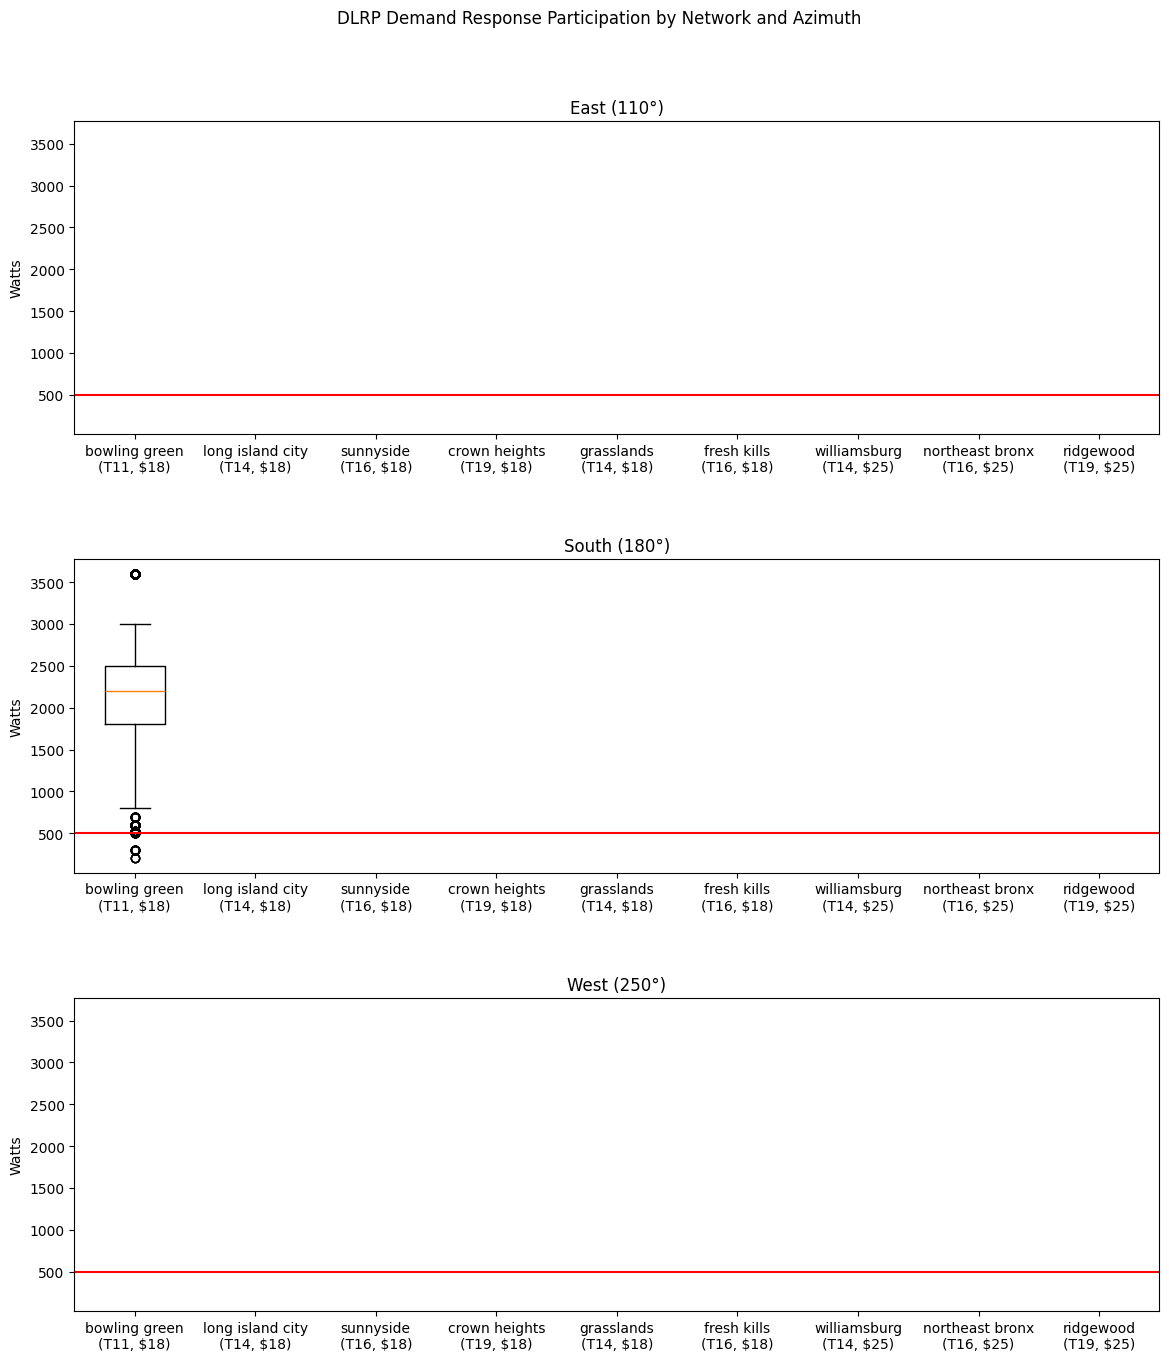

In [98]:
#box plot for DR, ROI, IAP... is there a way to represent a box plot for multidimension data? i.e pairs of PV and Bat specs? 

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['az'] == 180][favPBP_df_Z[favPBP_df_Z['az'] == 180]['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getDLRPrate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['avgMAPw_D']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Watts') 
    axs[a].axhline(500, c='r')

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('DLRP Demand Response Participation by Network and Azimuth')
    
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3236279103.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3236279103.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3236279103.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


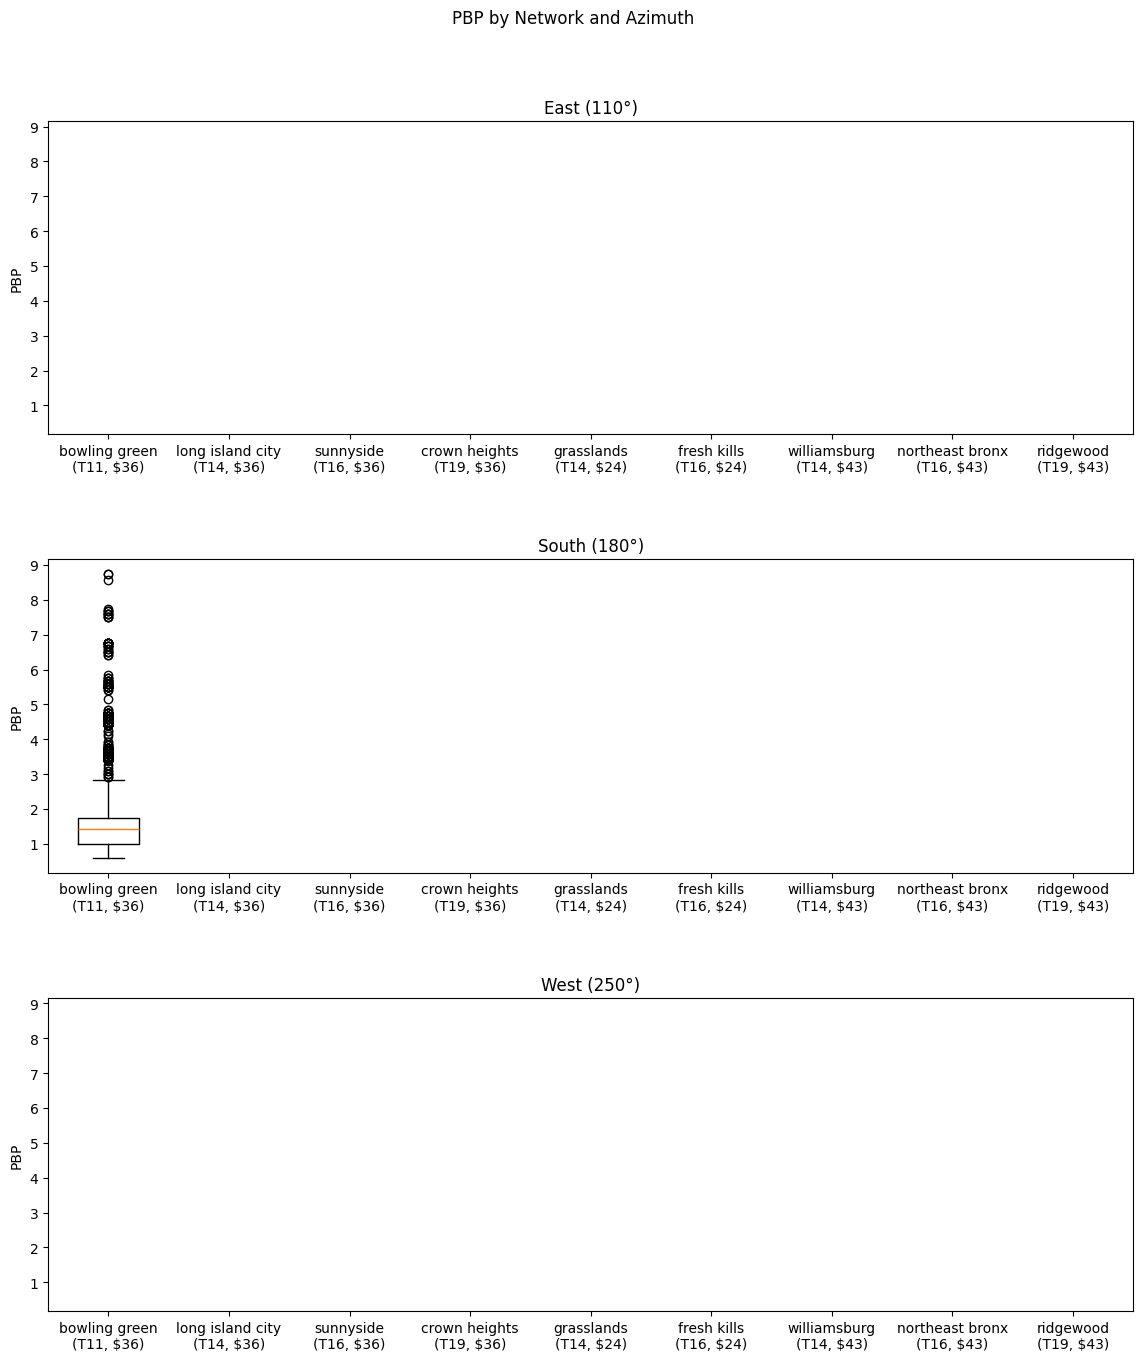

In [99]:
#box plot for ROI

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['realPayback']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('PBP') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('PBP by Network and Azimuth')
    
plt.show()


KeyError: 'incomeAfterRoi'

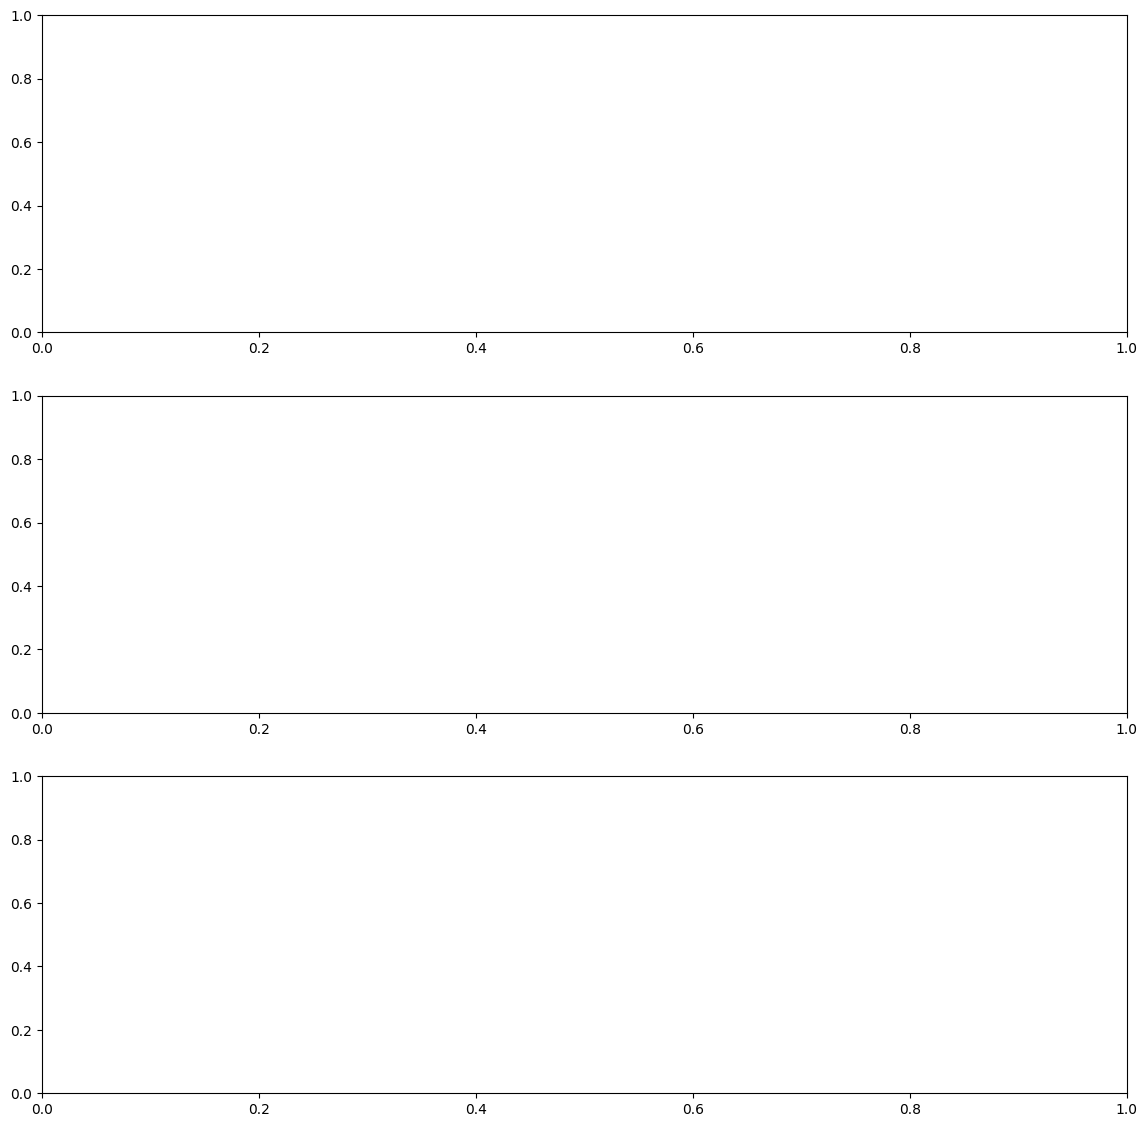

In [100]:
#box plot for IAP

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['incomeAfterRoi']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('IAP') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('IAP by Network and Azimuth')
    
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\540729411.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\540729411.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\540729411.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


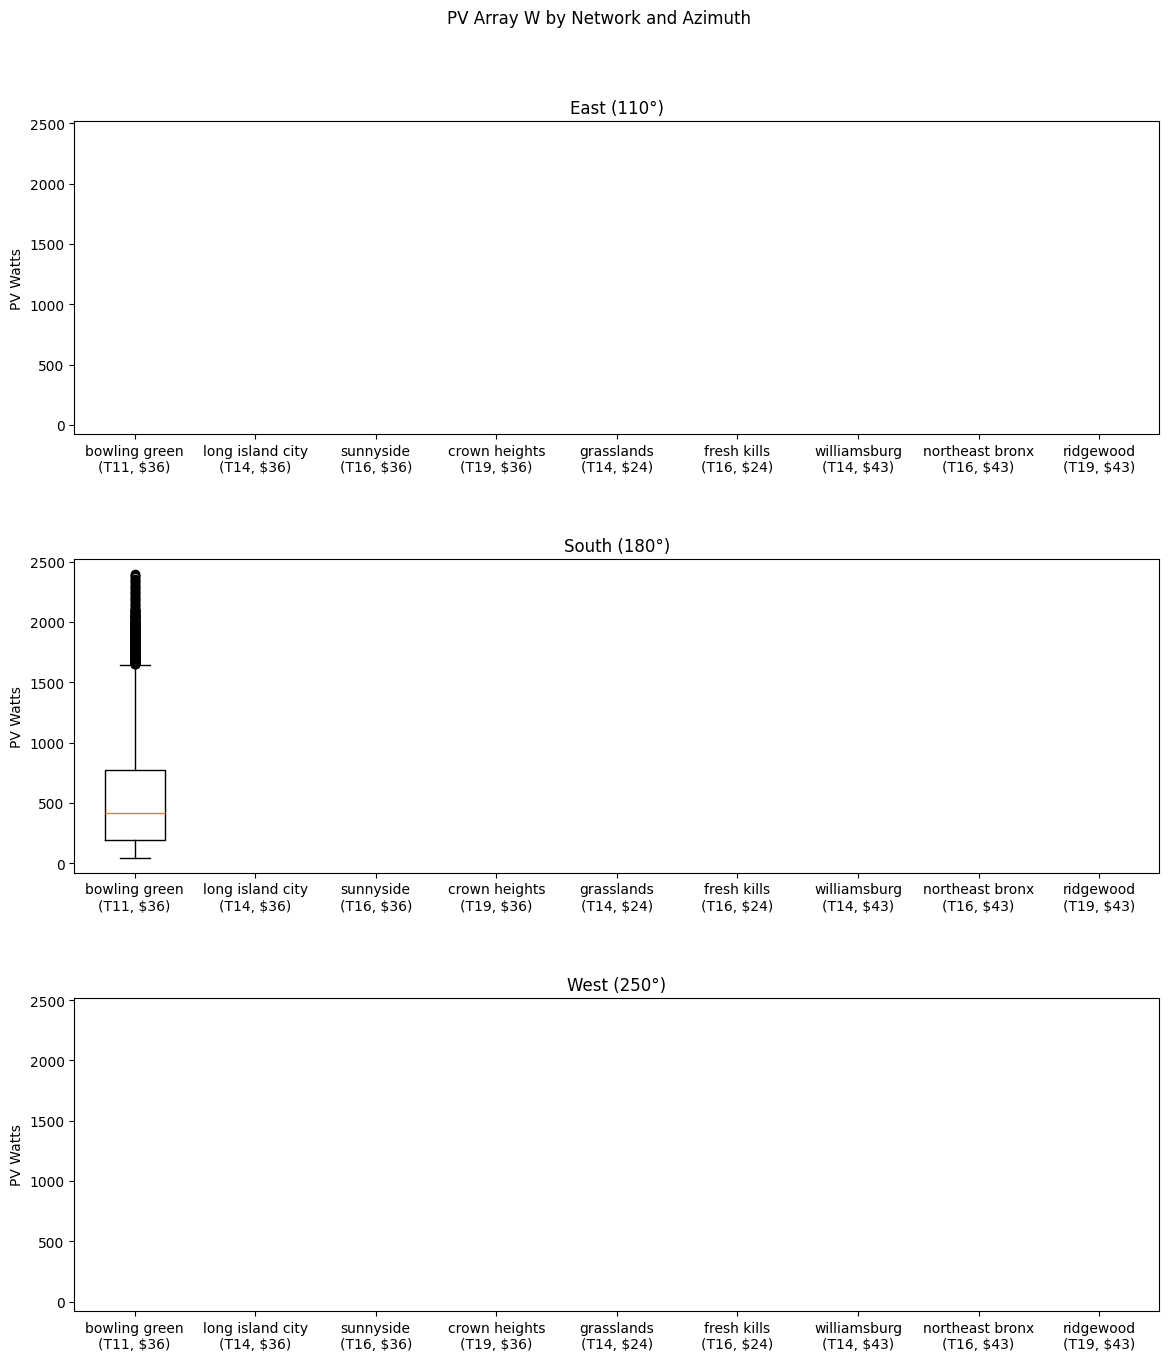

In [101]:
#box plot for IAP

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['pvW']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('PV Watts') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('PV Array W by Network and Azimuth')
    
plt.show()

C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1737051895.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1737051895.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1737051895.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


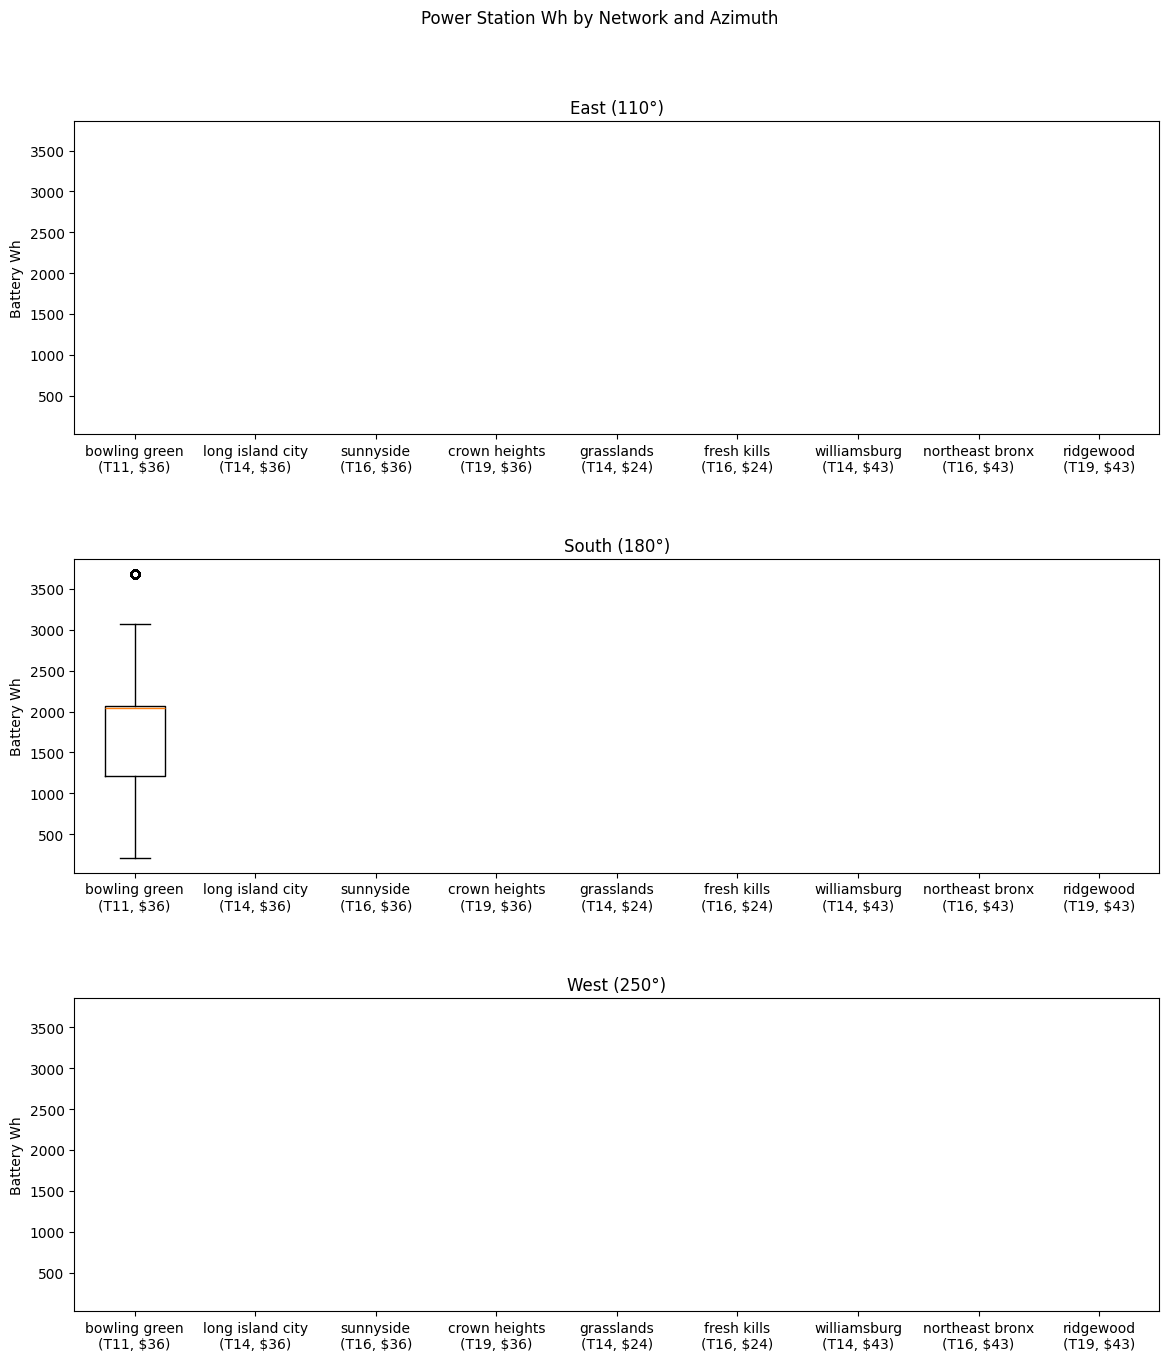

In [102]:
#box plot for IAP

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['batWh']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Battery Wh') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('Power Station Wh by Network and Azimuth')
    
plt.show()

<Axes: title={'center': 'Auto Participation CSRP'}, xlabel='avgMAPw_C', ylabel='eventStart'>

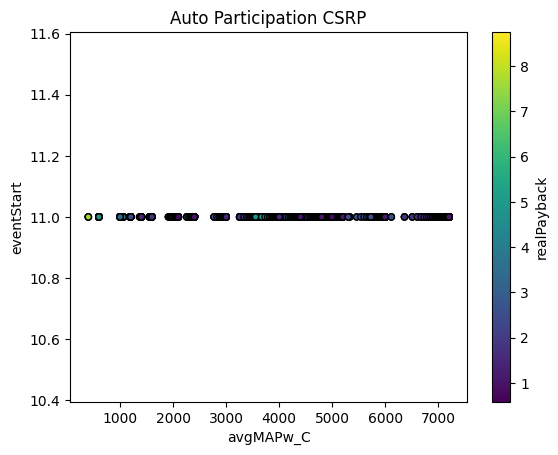

In [103]:
favPBP_df_Z.plot(kind = 'scatter', x = 'avgMAPw_C', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='Auto Participation CSRP')


<Axes: title={'center': 'Auto Participation DLRP'}, xlabel='avgMAPw_D', ylabel='eventStart'>

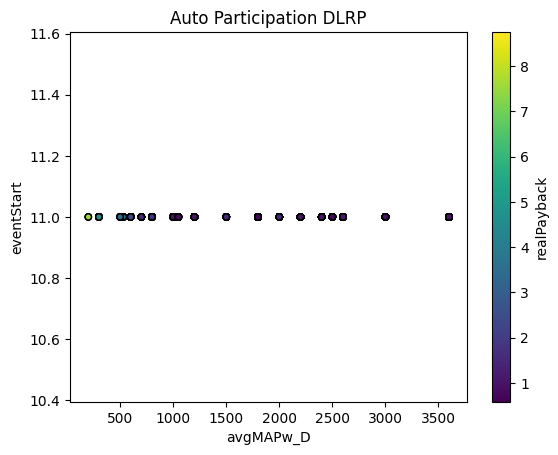

In [104]:
favPBP_df_Z.plot(kind = 'scatter', x = 'avgMAPw_D', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='Auto Participation DLRP')


KeyError: 'incomeAfterRoi'

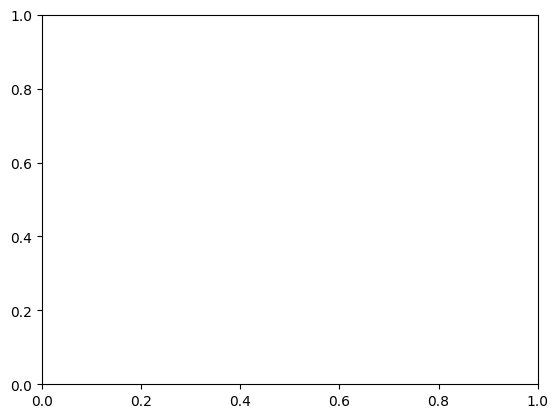

In [105]:
favPBP_df_Z.plot(kind = 'scatter', x = 'incomeAfterRoi', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='Income After ROI')


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'incomeAfterRoi'

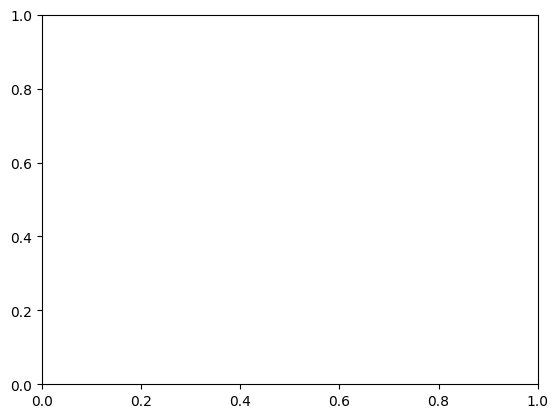

In [106]:
favPBP_df_Z.plot(kind = 'scatter', x = 'batWh', y = 'pvW', c='incomeAfterRoi',colormap='viridis', title='Available Hardware w/ Favorable ROIs')


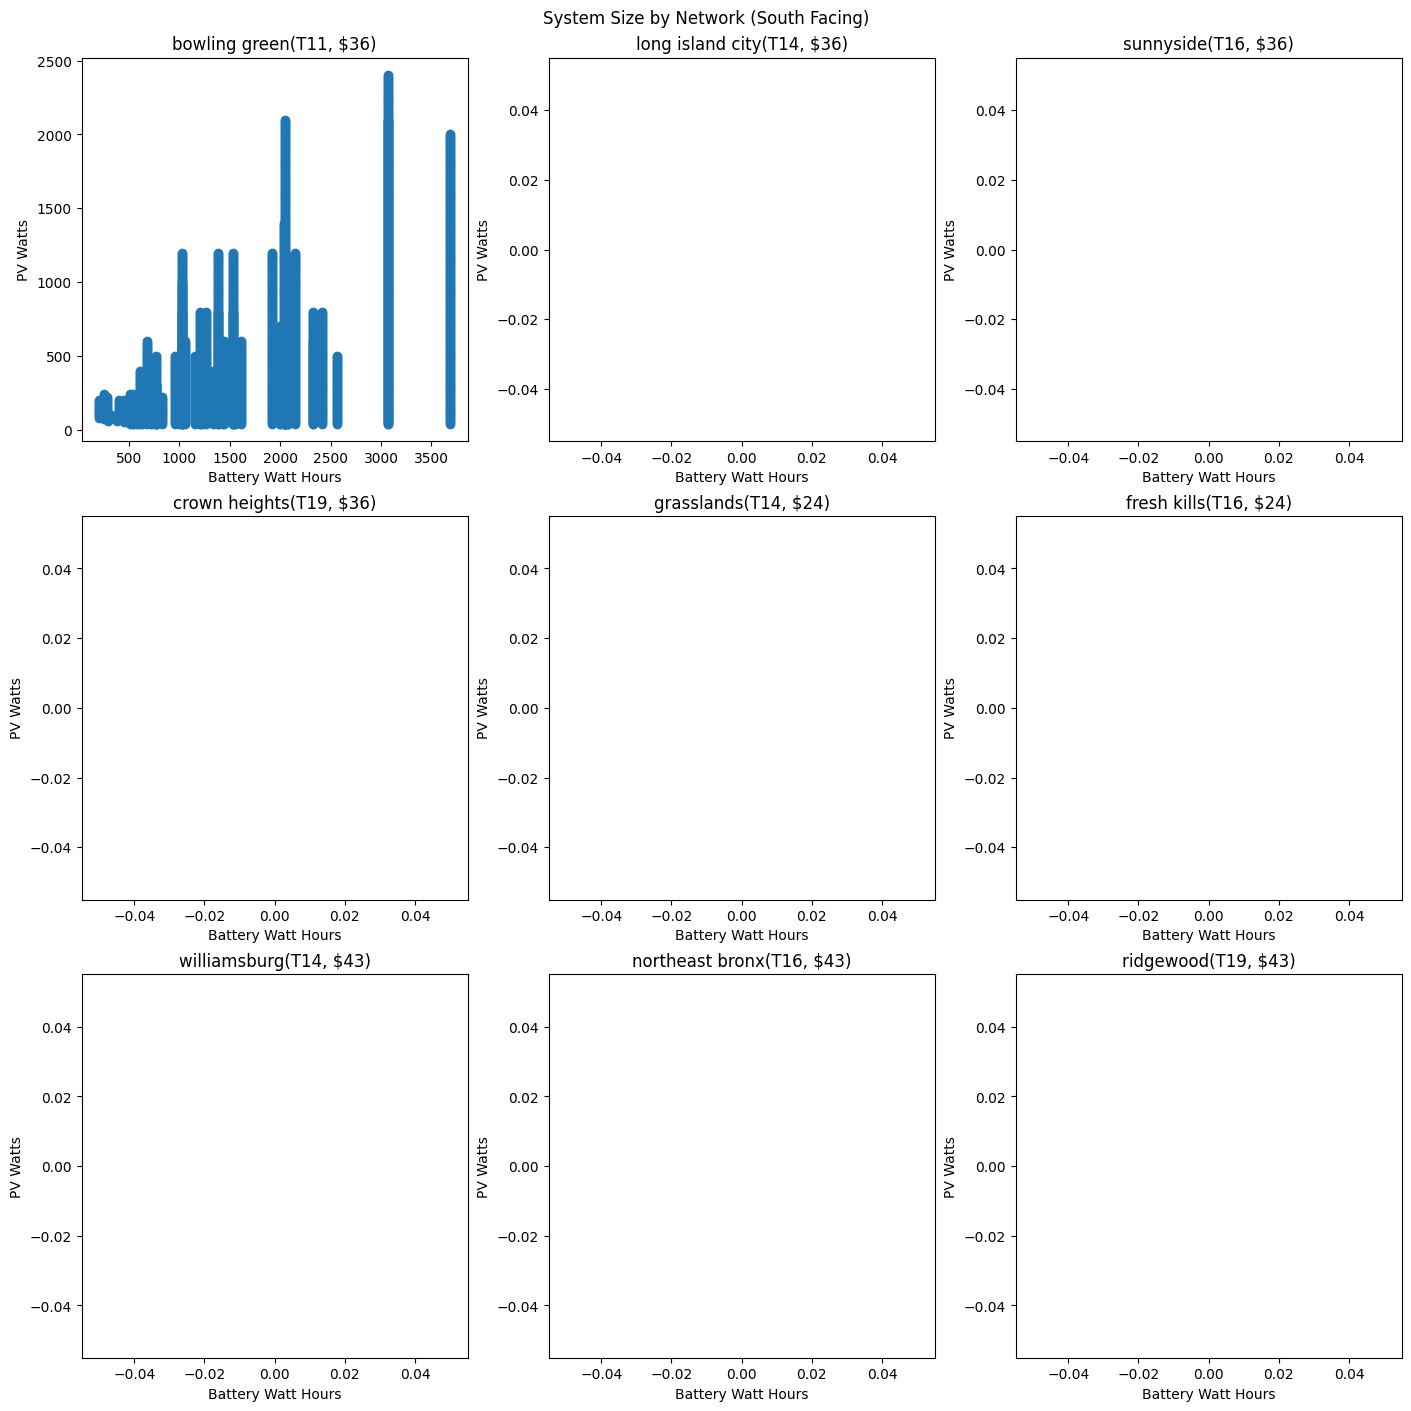

In [107]:
#hardware combos by network

fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = 180

hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]

myLabels=[]
for n in myNetworks:
    mN = hc_df[hc_df['network'] == n]
    myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):
        p = y+(3*x)
        n = myNetworks[p]     
        nhc_df = hc_df[hc_df['network'] == n]

        axs[x,y].scatter(x = nhc_df['batWh'], y = nhc_df['pvW'])
        axs[x,y].set_title(myLabels[p])
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('Battery Watt Hours') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('System Size by Network (South Facing)')
    
plt.show()

In [108]:
# #start time comparison

# fig, axs = plt.subplots(3, 4, figsize=(16, 12), layout="constrained",sharex=True,sharey=True)

# azi = [110,180,250]

# showNetworks = ['bowling green','long island city','sunnyside','crown heights']

# for x in range(3):
#     for y in range(4):
        
#         hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi[x]]

#         myLabels=[]
#         for n in showNetworks:
#             mN = hc_df[hc_df['network'] == n]
#             myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

#         n = showNetworks[y]     
#         nhc_df = hc_df[hc_df['network'] == n]

#         axs[x,y].scatter(x = nhc_df['batWh'], y = nhc_df['pvW'])
#         axs[x,y].set_title(myLabels[y])
#         axs[x,y].set_ylabel('PV Watts') 
#         axs[x,y].set_xlabel('Battery Watt Hours') 

# # fig.subplots_adjust(bottom=0.05, top=0.9,
# #                     hspace=0.4, wspace=0.3)
# fig.suptitle('System Size Time Comparison)')
    
# plt.show()

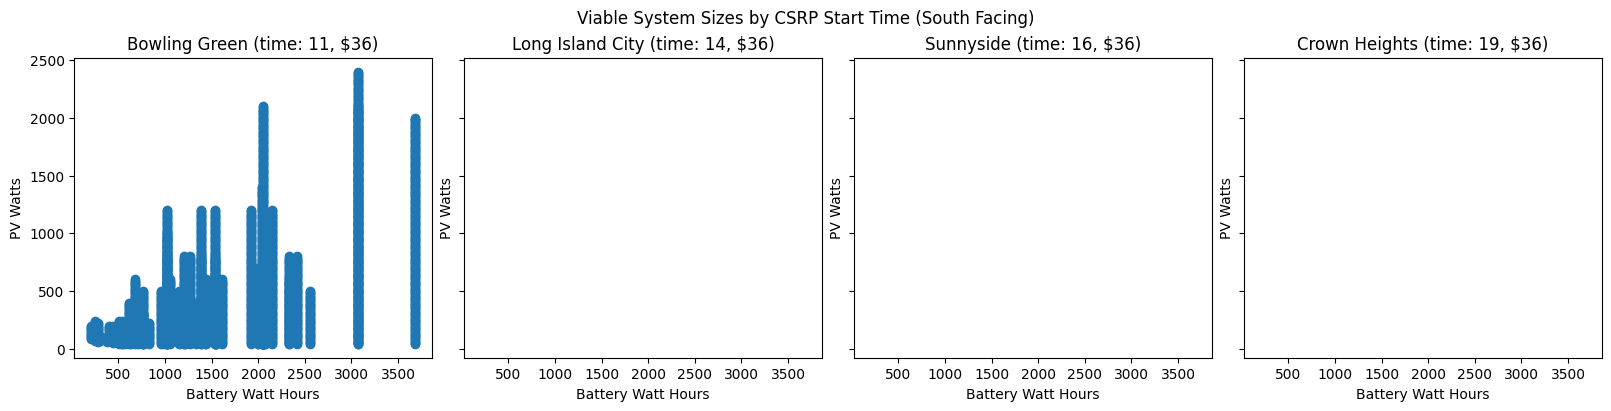

In [109]:
#start time comparison

fig, axs = plt.subplots(1,4, figsize=(16, 4), layout="constrained",sharex=True,sharey=True)

azi = 180
hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]

#showNetworks = ['bowling green','long island city','sunnyside','crown heights']
showNetworksUC = ['Bowling Green','Long Island City','Sunnyside','Crown Heights']

myLabels=[]
for n in showNetworksUC:
    mN = hc_df[hc_df['network'] == n.lower()]
    myLabels.append(n + " (time: "+ str(getStartTime(n.lower())) + ", $" + str(getTotalRate(n.lower())) +")")
        
for y in range(4):

    n = showNetworksUC[y]     
    nhc_df = hc_df[hc_df['network'] == n.lower()]

    axs[y].scatter(x = nhc_df['batWh'], y = nhc_df['pvW'])
    axs[y].set_title(myLabels[y])
    axs[y].set_ylabel('PV Watts') 
    axs[y].set_xlabel('Battery Watt Hours') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('Viable System Sizes by CSRP Start Time (South Facing)')
    
plt.show()

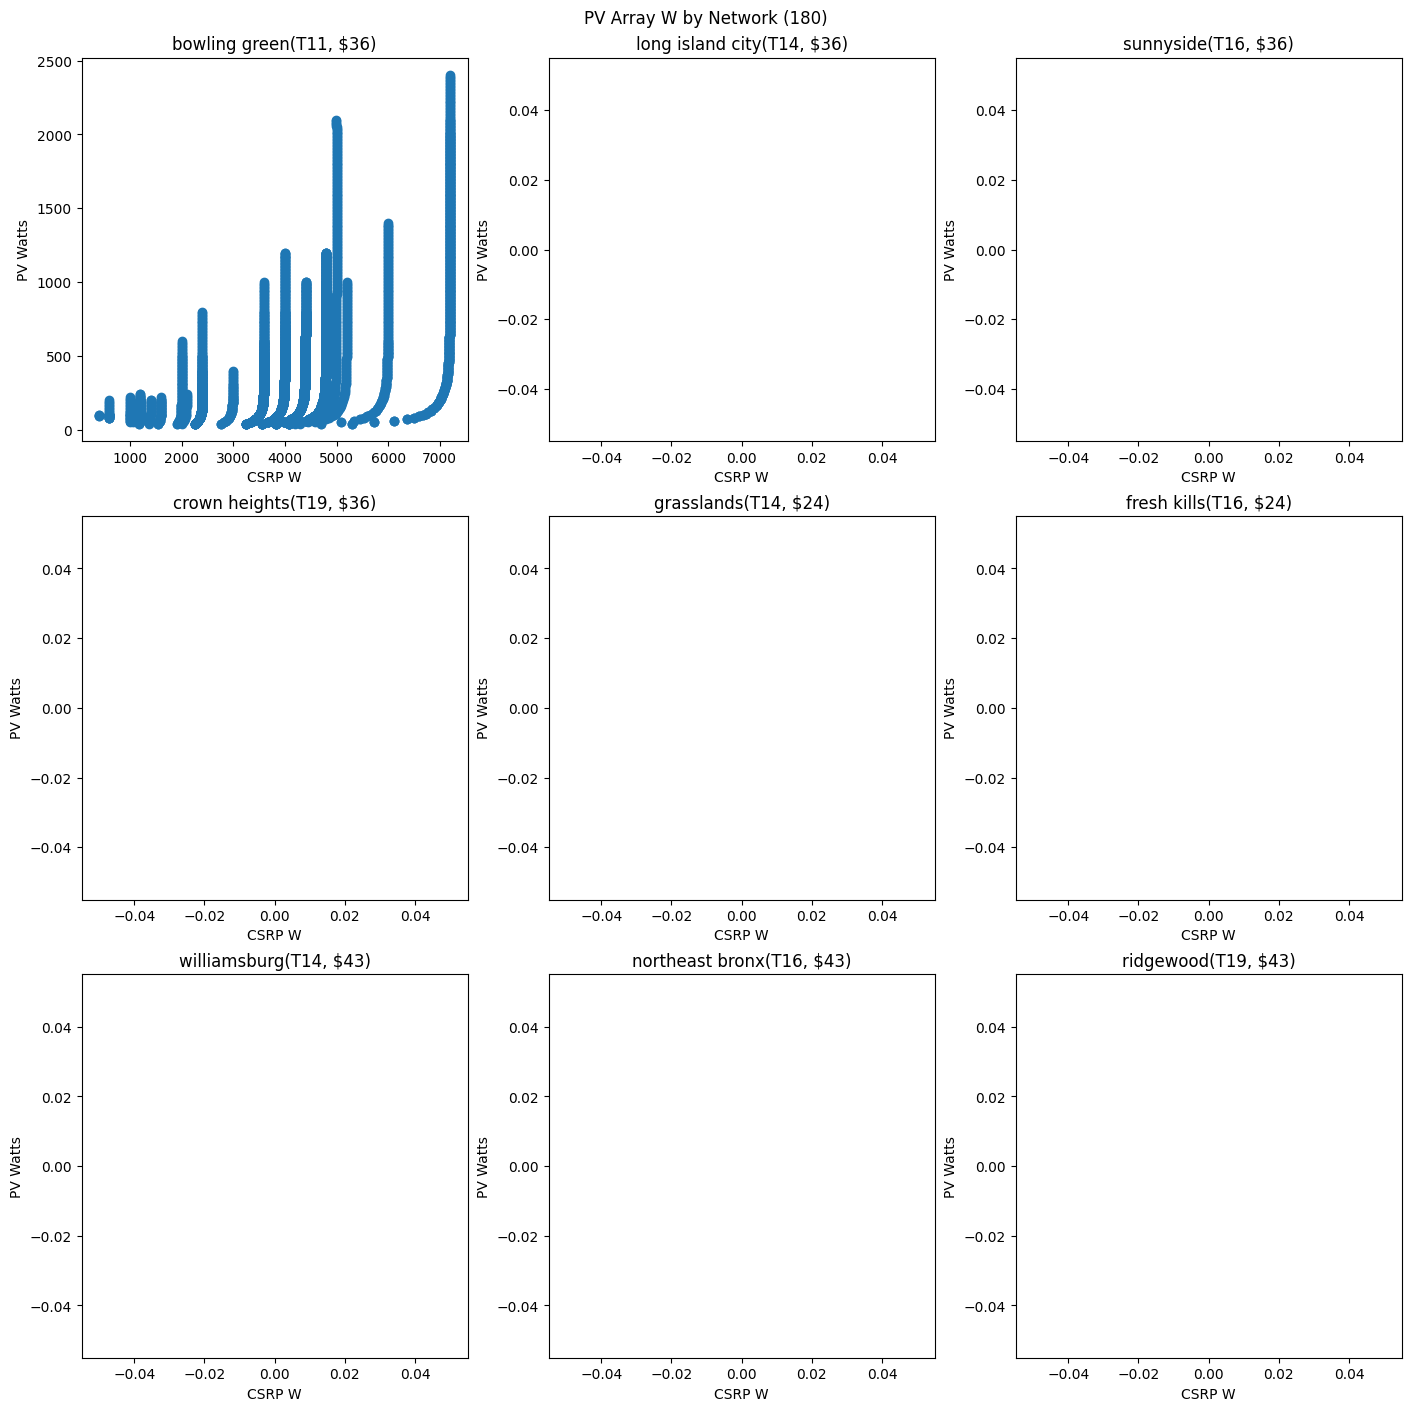

In [110]:
#CSRP vs PV

fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = 180

hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]

myLabels=[]
for n in myNetworks:
    mN = hc_df[hc_df['network'] == n]
    myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):
        p = y+(3*x)
        n = myNetworks[p]     
        nhc_df = hc_df[hc_df['network'] == n]

        axs[x,y].scatter(x = nhc_df['avgMAPw_C'], y = nhc_df['pvW'])
        axs[x,y].set_title(myLabels[p])
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('CSRP W') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('PV Array W by Network (180)')
    
plt.show()

In [111]:
favPBP_df_Z[favPBP_df_Z['incomeAfterRoi']>=400].plot(kind = 'scatter', x = 'batWh', y = 'pvW', c='incomeAfterRoi',colormap='viridis', title='Available Hardware w/ Favorable ROIs & high IAP')


KeyError: 'incomeAfterRoi'

KeyError: 'incomeAfterRoi'

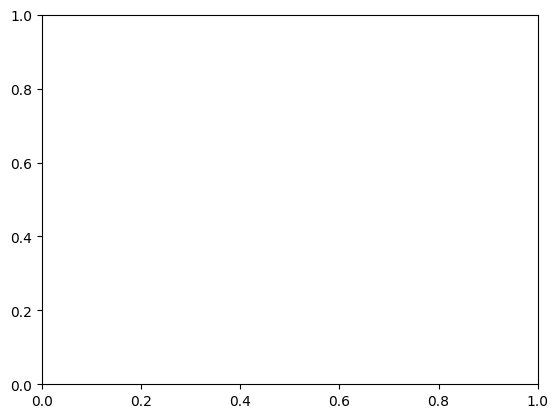

In [112]:
favPBP_df_Z[favPBP_df_Z['eventStart']==11].plot(kind = 'scatter', x = 'incomeAfterRoi', y = 'avgMAPw_C', c='pvW',colormap='viridis', title='Relationship between IAP and CSRP Participation (Event Time: 11am)')


KeyError: 'incomeAfterRoi'

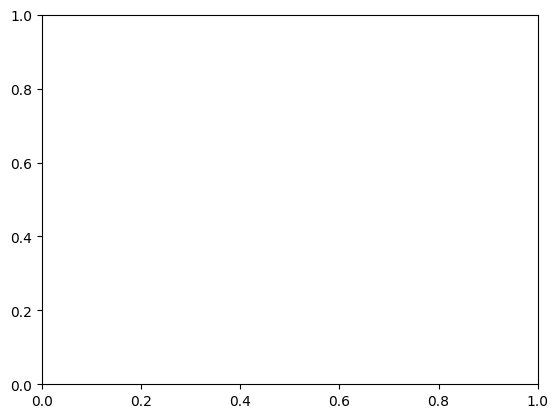

In [113]:
favPBP_df_Z[favPBP_df_Z['eventStart']==11].plot(kind = 'scatter', x = 'incomeAfterRoi', y = 'avgMAPw_D', c='pvW',colormap='viridis', title='Relationship between IAP and DLRP Participation (Event Time: 11am)')


In [105]:
highParticipation_df = favPBP_df_Z[favPBP_df_Z['avgMAPw_C']>=400]
highParticipation_df.shape[0]

369

## Unique Systems
Are there particular azimuths and network combos that have unique options or is it only more/less systems?

In [106]:
# favPBP_df_Z[favPBP_df_Z['avgMAPw_C']
            
            
# for n in myNetworks:    
#         nhc_df = hc_df[hc_df['network'] == n]

#         axs[x,y].scatter(x = nhc_df['avgMAPw_C'], y = nhc_df['pvW'])
#         axs[x,y].set_title(myLabels[p])
#         axs[x,y].set_ylabel('PV Watts') 
#         axs[x,y].set_xlabel('CSRP W') 

## Results for HOMER Validation

In [107]:
#data for validation


# 'E2000LFP Expandable': 7,
#  'P2001': 9,
#  'AC180': 9,
#  'ST2000': 4,
#  '2400 Portable Power Station': 7,
#  'Mega 2': 5,
#  'P1201': 9,
#  'DBS1300': 7,
#  'E1500LFP Expandable': 7,
#  'Explorer 700 Plus': 8,
#  '1800 Portable Power Station': 9,
#  'AC180P': 4,
#  'AC200P': 5,
#  'E600LFP': 9,
#  '1200 Portable Power Station': 2}

#print(favPBP_df_Z.keys())
model_df = favPBP_df_Z[favPBP_df_Z['batModel'] == 'AC180']
model_df = model_df[model_df['pvW']==470]
model_df[['network','az','pvW','avgAutoParticipationAnnualW_C','avgAutoParticipationAnnualW_D']]

network   az  pvW  \
1731      bowling green  110  470   
1872      bowling green  180  470   
2013      bowling green  250  470   
7785   long island city  180  470   
7926   long island city  250  470   
13698         sunnyside  180  470   
19611     crown heights  180  470   
37209      williamsburg  110  470   
37350      williamsburg  180  470   
37491      williamsburg  250  470   
43263   northeast bronx  180  470   
49176         ridgewood  180  470   

                           avgAutoParticipationAnnualW_C  \
1731   [377.15000206012104, 375.23323649219316, 373.3...   
1872   [404.0987050655982, 401.9136247246685, 399.750...   
2013   [403.14437293140816, 400.9687624946718, 398.81...   
7785   [305.08355462852916, 303.8899248633385, 302.70...   
7926   [337.26455006644113, 335.74970882836067, 334.2...   
13698  [227.06159565077445, 226.6886030084488, 226.31...   
19611  [196.10772894427728, 196.10772894427728, 196.1...   
37209  [268.5255596321657, 267.6977139106444, 266.878...   
37350  [305.08355462852916, 303.8899248633385, 302.70...   
37491  [337.26455006644113, 335.74970882836067, 334.2...   
43263  [227.06159565077445, 226.6886030084488, 226.31...   
49176  [196.10772894427728, 196.10772894427728, 196.1...   

                           avgAutoParticipationAnnualW_D  
1731   [196.10772894427728, 196.10772894427728, 196.1...  
1872   [196.10772894427728, 196.10772894427728, 196.1...  
2013   [196.10772894427728, 196.10772894427728, 196.1...  
7785   [196.10772894427728, 196.10772894427728, 196.1...  
7926   [196.10772894427728, 196.10772894427728, 196.1...  
13698  [196.10772894427728, 196.10772894427728, 196.1...  
19611  [196.10772894427728, 196.10772894427728, 196.1...  
37209  [196.10772894427728, 196.10772894427728, 196.1...  
37350  [196.10772894427728, 196.10772894427728, 196.1...  
37491  [196.10772894427728, 196.10772894427728, 196.1...  
43263  [196.10772894427728, 196.10772894427728, 196.1...  
49176  [196.10772894427728, 196.10772894427728, 196.1...

In [108]:
model_df = favPBP_df_Z[favPBP_df_Z['batModel'] == '1200 Portable Power Station']
model_df = model_df[model_df['pvW']==230]
model_df[['network','az','avgAutoParticipationAnnualW_C','avgAutoParticipationAnnualW_D']]

Empty DataFrame
Columns: [network, az, avgAutoParticipationAnnualW_C, avgAutoParticipationAnnualW_D]
Index: []

## Impact of Immediate Events

In [109]:
snapShot(favPBP_df_Z)

Amount of systems: 1403

Min Lifespan: 9.58904109589041
Mean Lifespan: 9.654458645368534
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 9.58904109589041
Mean working life: 9.601636415118287
Median working life: 9.58904109589041
Max working life: 10.0

Fastest ROI: 7.333333333333333yrs
Mean ROI: 9.050546448087433
Median ROI: 9.166666666666666
Slowest ROI: 10.0yrs

Greatest IAR: $450.0228813068793 ($46.93095762200313/per year for 9.58904109589041 years)
Mean IAR: 99.5415948947731
Median IAR: 83.47530312683938
Lowest IAR: $0.0 ($0.0/per year for 10 years)

Greatest IAR Split: $46.93095762200313
Mean IAR Split: 10.37586270078544
Median IAR Split: 8.705281611798965
Lowest IAR Split: $0.0

Combinations with Minimum PV Arrays: 
{'[280, 614.0]', '[280, 1488.0]', '[280, 960.0]'}
Combinations with Maximum PV Arrays: 
{'[500, 2232.0]', '[500, 960.0]', '[500, 2000.0]', '[500, 1536.0]', '[500, 2073.0]', '[500, 680.96]', '[500, 2048.0]', '[500, 1152.0]', '[500, 

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [110]:
snapShot(favPBP_df_O)

Amount of systems: 1381

Min Lifespan: 9.58904109589041
Mean Lifespan: 9.655500778669415
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 9.58904109589041
Mean working life: 9.601837064664277
Median working life: 9.58904109589041
Max working life: 10.0

Fastest ROI: 7.333333333333333yrs
Mean ROI: 9.048032826454259
Median ROI: 9.166666666666666
Slowest ROI: 10.0yrs

Greatest IAR: $450.0228813068793 ($46.93095762200313/per year for 9.58904109589041 years)
Mean IAR: 99.80049694000199
Median IAR: 83.48573111493914
Lowest IAR: $0.0 ($0.0/per year for 10 years)

Greatest IAR Split: $46.93095762200313
Mean IAR Split: 10.402784368393537
Median IAR Split: 8.70636910198651
Lowest IAR Split: $0.0

Combinations with Minimum PV Arrays: 
{'[280, 614.0]', '[280, 960.0]'}
Combinations with Maximum PV Arrays: 
{'[500, 2232.0]', '[500, 960.0]', '[500, 2000.0]', '[500, 1536.0]', '[500, 2073.0]', '[500, 680.96]', '[500, 2048.0]', '[500, 1152.0]', '[500, 1920.0]', '[500,

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
snapShot(favPBP_df_F)

Amount of systems: 1305

Min Lifespan: 9.58904109589041
Mean Lifespan: 9.659371227628194
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 9.58904109589041
Mean working life: 9.60258227050858
Median working life: 9.58904109589041
Max working life: 10.0

Fastest ROI: 7.333333333333333yrs
Mean ROI: 9.037739463601532
Median ROI: 9.166666666666666
Slowest ROI: 10.0yrs

Greatest IAR: $450.0228813068793 ($46.93095762200313/per year for 9.58904109589041 years)
Mean IAR: 100.99817760727628
Median IAR: 84.52854768970295
Lowest IAR: $0.0 ($0.0/per year for 10 years)

Greatest IAR Split: $46.93095762200313
Mean IAR Split: 10.527395227882634
Median IAR Split: 8.815119973354737
Lowest IAR Split: $0.0

Combinations with Minimum PV Arrays: 
{'[280, 614.0]', '[280, 960.0]'}
Combinations with Maximum PV Arrays: 
{'[500, 2232.0]', '[500, 960.0]', '[500, 2000.0]', '[500, 1536.0]', '[500, 2073.0]', '[500, 680.96]', '[500, 2048.0]', '[500, 1152.0]', '[500, 1920.0]', '[500

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
# #bar roi by frequency

# fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

# subTitles =['Zero','Low','High']

# plot_df = [favPBP_df_Z[favPBP_df_Z['az']==180],favPBP_df_O[favPBP_df_O['az']==180],favPBP_df_F[favPBP_df_F['az']==180]]
# for f in range(3):

#     axs[f].hist(plot_df[f]['realPayback'])
#     axs[f].set_title(subTitles[f])
#     #axs[f].set_ylabel('DLRP W') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
# fig.suptitle('ROI by Frequency Group (180)')
    
# plt.show()

In [113]:
# #box plot for IAP

# fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

# azi = [110,180,250]
# subTitles =['East','South','West']

# #get labels using south facing facade because there are no non-data networks
# # myLabels=[]
# # for n in myNetworks:
# #     mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
# #     myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

# for a in range(3):
#     boxPlotData = []

#     boxPlotData.append(list(favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]['avgMAPw_D']))
#     boxPlotData.append(list(favPBP_df_O[favPBP_df_O['az'] == azi[a]]['avgMAPw_D']))
#     boxPlotData.append(list(favPBP_df_F[favPBP_df_F['az'] == azi[a]]['avgMAPw_D']))

# #     for n in myNetworks:
# #         bP = bPD[bPD['network'] == n]
# #         boxPlotData.append(list(bP['incomeAfterRoi']))

#     axs[a].boxplot(boxPlotData, labels=['Zero','Low','High'])
#     axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
#     axs[a].set_ylabel('DLRP W') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
# fig.suptitle('DLRP Max Auto Performance by Frequency Group and Azimuth')
    
# plt.show()

# What systems are unique to different frequency groups?

In [114]:
favPBP_df_F.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'realRoi',
       'Cycles', 'lifespan', 'workingLife', 'profitableYears',
       'incomeAfterRoi', 'iarSplit', 'totalDR_AnnualAvgInc'],
      dtype='object')

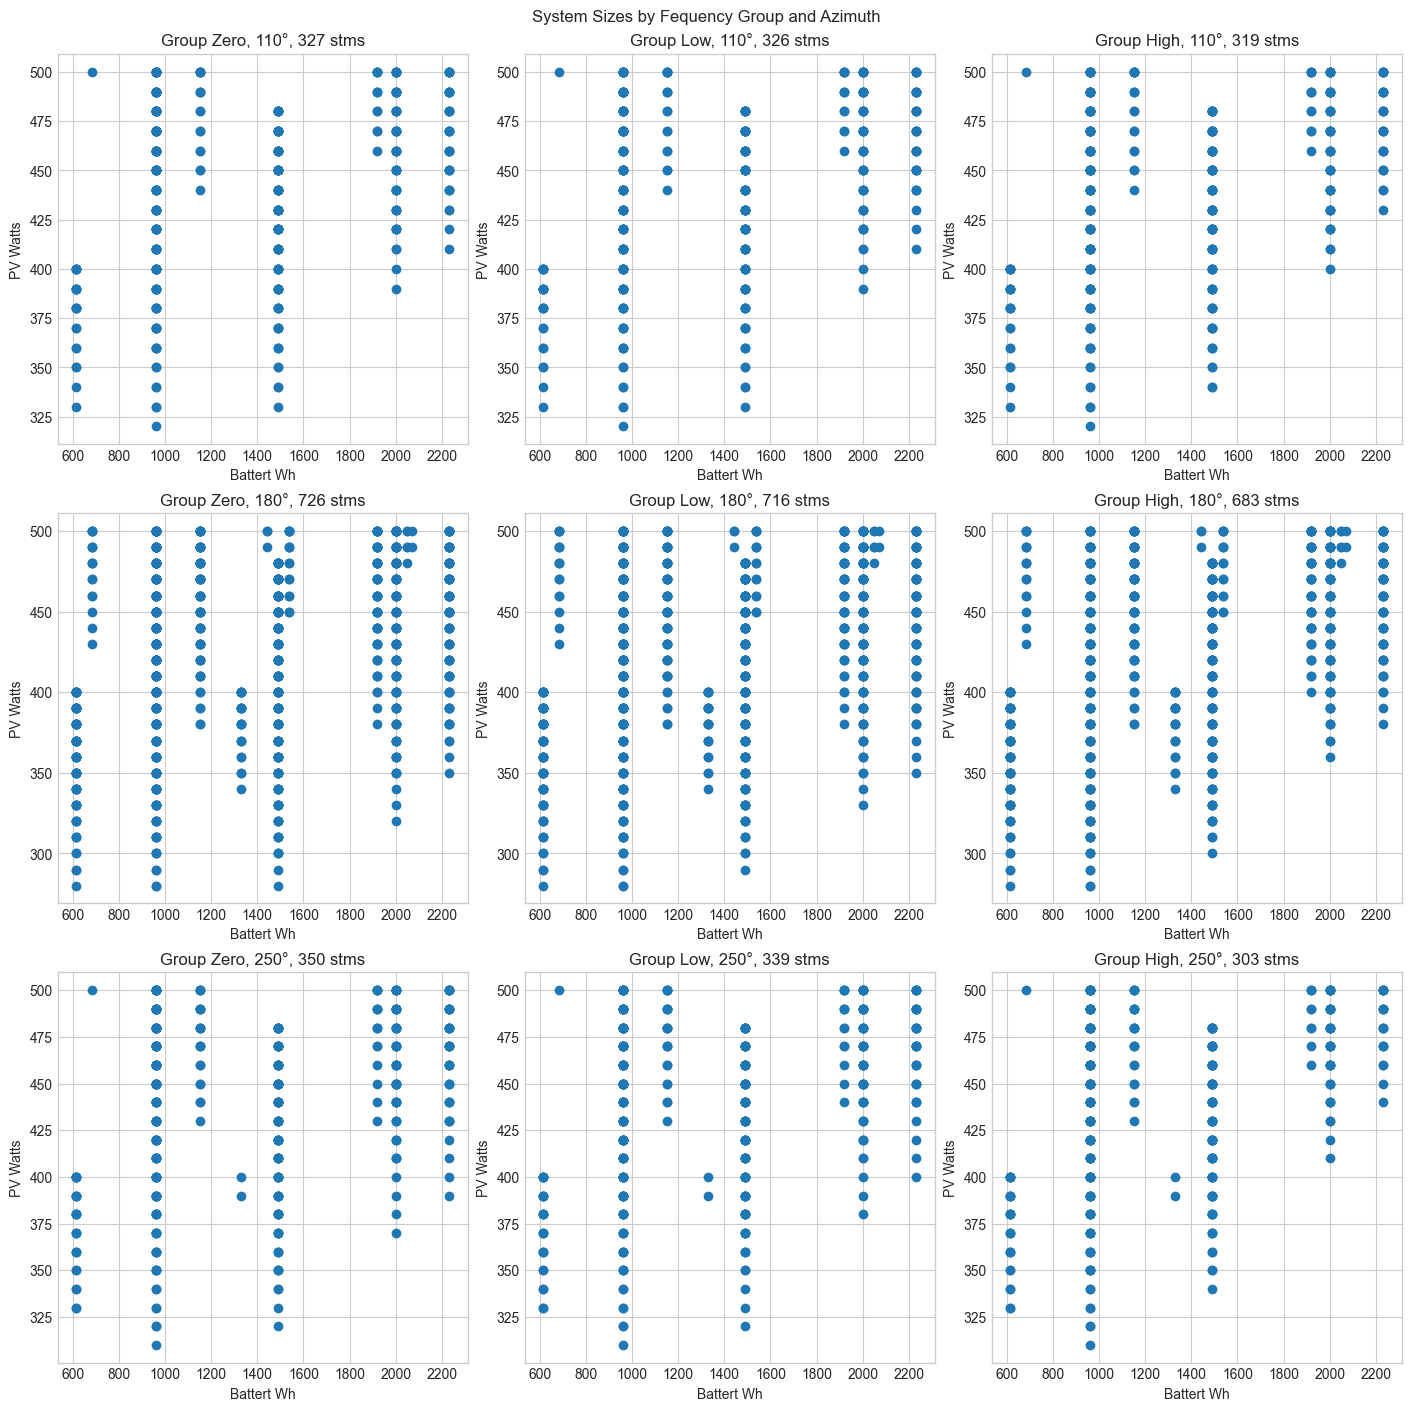

In [115]:
#compare systems accross azimuth and frequencies
fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = [110,180,250]

# z_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]
# o_df = favPBP_df_O[favPBP_df_O['az'] == azi]
# f_df = favPBP_df_F[favPBP_df_F['az'] == azi]

fGroups =['Zero','Low','High']
data_df = [favPBP_df_Z,favPBP_df_O,favPBP_df_F]

# for n in myNetworks:
#     mN = hc_df[hc_df['network'] == n]
#     myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):        
        #p = y+(3*x)
        #n = myNetworks[p]  
        
        plot_df = data_df[y][data_df[y]['az']==azi[x]]

        stmAmt = plot_df.shape[0]
        
        axs[x,y].scatter(x = plot_df['batWh'], y = plot_df['pvW'])
        axs[x,y].set_title('Group ' + fGroups[y] + ', ' + str(azi[x]) + '\N{DEGREE SIGN}, ' + str(stmAmt) + ' stms')
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('Battert Wh') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('System Sizes by Fequency Group and Azimuth')
    
plt.show()

Group Zero: \$18C, \$18D, 343 stms
280, 423.81924198250726, 430, 500

Group Low: \$18C, \$18D, 342 stms
280, 423.859649122807, 430.0, 500

Group High: \$18C, \$18D, 330 stms
280, 424.8787878787879, 430.0, 500

Group Zero: \$6C, \$18D, 41 stms
370, 439.7560975609756, 440, 500

Group Low: \$6C, \$18D, 41 stms
370, 439.7560975609756, 440, 500

Group High: \$6C, \$18D, 41 stms
370, 439.7560975609756, 440, 500

Group Zero: \$18C, \$25D, 342 stms
280, 415.17543859649123, 420.0, 500

Group Low: \$18C, \$25D, 333 stms
280, 417.14714714714717, 420, 500

Group High: \$18C, \$25D, 312 stms
280, 420.38461538461536, 430.0, 500



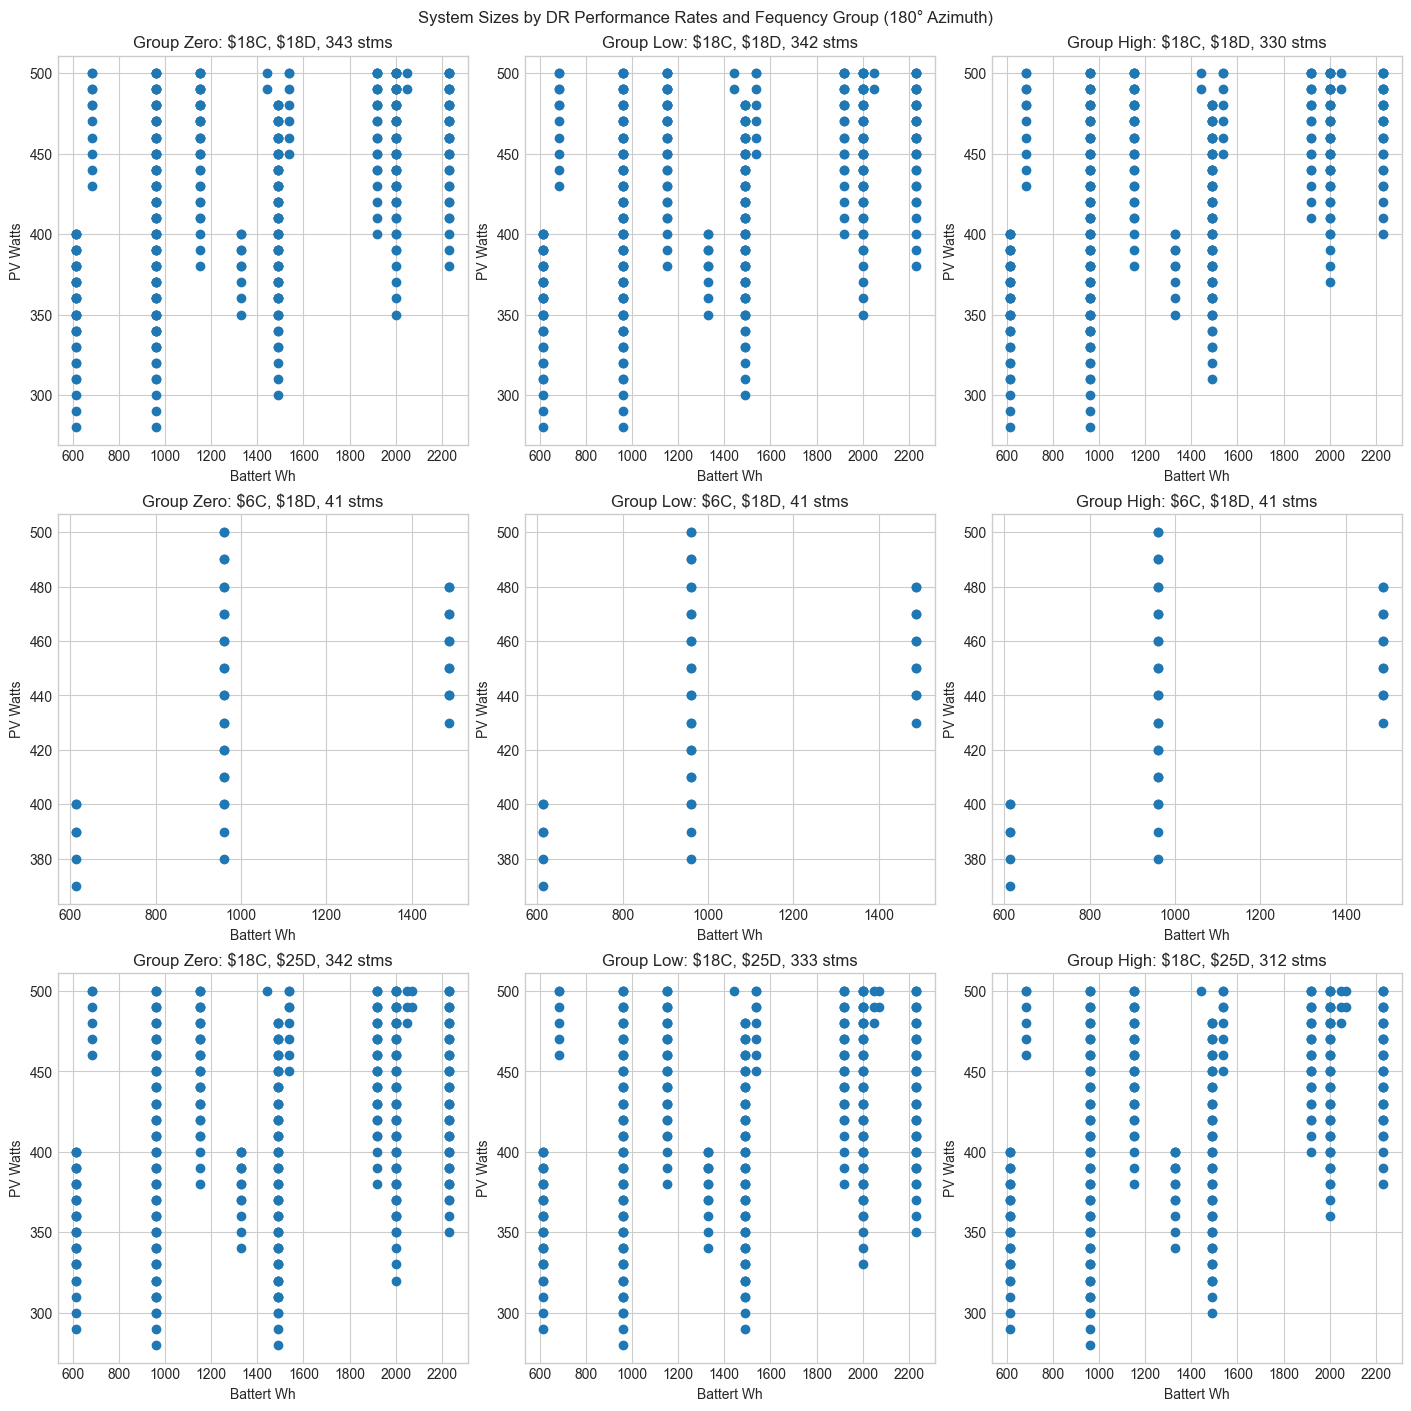

In [116]:
#compare systems accress DR income groups and frequencies

fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = 180

drRates = [36,24,43]
drRateLabels=['\$18C, \$18D','\$6C, \$18D','\$18C, \$25D']

z_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]
o_df = favPBP_df_O[favPBP_df_O['az'] == azi]
f_df = favPBP_df_F[favPBP_df_F['az'] == azi]

fGroups =['Zero','Low','High']

data_df = [z_df,o_df,f_df]

# for n in myNetworks:
#     mN = hc_df[hc_df['network'] == n]
#     myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):
        r = drRates[x]
        
        p = y+(3*x)
        #n = myNetworks[p]  
        
        plot_df = data_df[y][data_df[y]['totalDRratekW']==r]

        stmAmt = plot_df.shape[0]
        
        axs[x,y].scatter(x = plot_df['batWh'], y = plot_df['pvW'])
        axs[x,y].set_title('Group ' + fGroups[y] + ': ' + drRateLabels[x] + ', ' + str(stmAmt) + ' stms')
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('Battert Wh') 
        
        print('Group ' + fGroups[y] + ': ' + drRateLabels[x] + ', ' + str(stmAmt) + ' stms')
        print(str(min(plot_df['pvW'])) + ', ' + str(mean(plot_df['pvW'])) + ', ' + str(median(plot_df['pvW'])) + ', '+ str(max(plot_df['pvW'])))
        print('')

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('System Sizes by DR Performance Rates and Fequency Group (180\N{DEGREE SIGN} Azimuth)')
    
plt.show()

## Loads


### Typical Appliances

#### Fixed
* Refrigerator

#### Behavior Dependent
Note that baselines are determined by X, so random loads that aren't used at generally the same time each day wouldn't be considered.
* AC
* Fan
* Lamp
* Overhead lights
* Computer
* Electric Stove
* Convection stove

### 4 hour rates

In [71]:
favPBP_df.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'realRoi',
       'Cycles', 'lifespan', 'workingLife', 'profitableYears',
       'incomeAfterRoi', 'iarSplit'],
      dtype='object')

In [72]:
#Discharge rate is the amount of power required to offload per hour during an event
# print('Min discharge rate: ' + str(min(favPBP_df['dischargeRateW'])))
# print('Mean discharge rate: ' + str(favPBP_df['dischargeRateW'].mean()))
# print('Median discharge rate: ' + str(favPBP_df['dischargeRateW'].median()))
# print('Max discharge rate: ' + str(max(favPBP_df['dischargeRateW'])))

In [73]:
#Max stored available energy AC
favPBP_df['availWhAC'] = favPBP_df['batWhAC']*.8

print('Available Stored Energy:')
minStoredWh = min(favPBP_df['availWhAC'])
maxStoredWh = max(favPBP_df['availWhAC'])

print('Min: ' + str(minStoredWh))
print('Mean: ' + str(favPBP_df['availWhAC'].mean()))
print('Median: ' + str(favPBP_df['availWhAC'].median()))
print('Max: ' + str(maxStoredWh))

Available Stored Energy:
Min: 397.09751586842384
Mean: 966.7926175700919
Median: 1012.4728291503769
Max: 1635.087562992832


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# Typical refrigerator
# source: https://www.energysage.com/electricity/house-watts/how-many-watts-does-a-refrigerator-use/#:~:text=A%20home%20refrigerator's%20power%20consumption,amps%20and%20about%20120%20volts.
fridgeDutyCycle = .333

fridgeMaxW = 800 * fridgeDutyCycle
fridgeMinW = 300 * fridgeDutyCycle

print('Fridge Watts')
print('Max: ' + str(fridgeMaxW) + 'W (' + str(fridgeMaxW * 24) + ' Wh/day)')
print('Min: ' + str(fridgeMinW) + 'W (' + str(fridgeMinW * 24) + ' Wh/day)')


Fridge Watts
Max: 266.40000000000003W (6393.6 Wh/day)
Min: 99.9W (2397.6000000000004 Wh/day)


In [75]:
# Min and Max Static Load Consumption Times
favPBP_df['staticRTmin'] = favPBP_df['availWhAC']/fridgeMaxW
favPBP_df['staticRTmax'] = favPBP_df['availWhAC']/fridgeMinW

print("min static consumption time: " + str(min(favPBP_df['staticRTmin'])))
print("max static consumption time: " + str(max(favPBP_df['staticRTmax'])))

print("Mean Min/Max")
print("mean min static consumption time: " + str(favPBP_df['staticRTmin'].median()))
print("mean max static consumption time: " + str(favPBP_df['staticRTmax'].median()))

min static consumption time: 1.4906062907973865
max static consumption time: 16.36724287280112
Mean Min/Max
mean min static consumption time: 3.8005736829969097
mean max static consumption time: 10.134863154658428


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
#dynamic load requirements

#DR inc
avgAnnDR_C_Min = []
avgAnnDR_C_Max = []

favPBP_df['dynamicLoadMin'] = favPBP_df['avgMAPw_C']-fridgeMaxW
favPBP_df['dynamicLoadMax'] = favPBP_df['avgMAPw_C']-fridgeMinW

print('Dynamic Load Requirements During CRSP Events')
print('Min: ' + str(max(0,min(favPBP_df['dynamicLoadMin']))))
print('Max: ' + str(max(favPBP_df['dynamicLoadMin'])))
print('Median Range: ' + str(favPBP_df['avgMAPw_C'].median()-fridgeMaxW) + ' - ' + str(favPBP_df['avgMAPw_C'].median()-fridgeMinW))

Dynamic Load Requirements During CRSP Events
Min: 0
Max: 353.27249090043875
Median Range: 29.18855023127435 - 195.68855023127438


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Final Analysis

Compare to Nest thermostat

## Get Favorable Battery Makes and Models

In [77]:
hardware_df = pd.read_csv('data/PowerStations_LiFePo4_Feb1.csv')

#clean data - these columns aren't used in this analysis
hardware_df = hardware_df.drop(columns=['Link','Battery Type','App Control','Bypass Mode','Min PV Voltage','Max PV Voltage','Max AC Input Amps'
                                        , 'Warranty Years','Lifespan','Notes','Real Minimum Grid Charge Efficiency','Estimated Minimum Grid Charge Efficiency'])


In [78]:
favBatWh

[680.96,
 614.0,
 1536.0,
 1920.0,
 1152.0,
 1440.0,
 2000.0,
 992.0,
 1488.0,
 2232.0,
 2048.0,
 2073.0,
 1330.0,
 960.0]

In [79]:
#filter by favorable battery type
favBat_df = hardware_df[hardware_df['Battery Wh'].isin(favBatWh)]

#filter by battery size
favBat_df = favBat_df[favBat_df['Battery Wh'] <= 2000]

#filter by dod
favBat_df = favBat_df[favBat_df['DoD'] >= 80]

display(favBat_df.shape)

favBat_df

(13, 20)

Make                             Model  Battery Wh  Max PV Watts  \
4     Pecron                           E600LFP       614.0           400   
5     Pecron               E1500LFP Expandable      1536.0           800   
6     Pecron               E2000LFP Expandable      1920.0          1200   
17   Bluetti                             AC180      1152.0           500   
18   Bluetti                            AC180P      1440.0           500   
19   Bluetti                            AC200P      2000.0           700   
33     Anker                       SOLIX F1500      1536.0           600   
36     Oupes       1200 Portable Power Station       992.0           240   
37     Oupes       1800 Portable Power Station      1488.0           480   
48  Dabbsson                           DBS1300      1330.0           400   
59   OUKITEL                             P1201       960.0           500   
60   OUKITEL                             P2001      2000.0           500   
62   Zendure  SuperBase Pro Power Station 1500      1440.0           600   

    W to Wh Ratio  Max PV Amps  Inverter Watts  Max AC Input Watts  \
4        0.651466          7.0            1200                 NaN   
5        0.520833          7.0            2200              1400.0   
6        0.625000          7.0            2000                 NaN   
17       0.434028         10.0            1800              1440.0   
18       0.347222         10.0            1800              1440.0   
19       0.350000         12.0            2000               500.0   
33       0.390625          NaN            1800                 NaN   
36       0.241935          NaN            1200                 NaN   
37       0.322581          NaN            1800                 NaN   
48       0.300752          NaN            1200                 NaN   
59       0.520833         15.0            1200               700.0   
60       0.250000         15.0            2000              1100.0   
62       0.416667         10.0            2000              1800.0   

    Full Grid Charge Hours  80 Per Grid Charge Hours  AC Charger Watts  \
4                      2.2                       NaN               NaN   
5                      1.8                       NaN               NaN   
6                      2.0                       NaN               NaN   
17                     NaN                  0.750000               NaN   
18                     NaN                  0.750000               NaN   
19                     4.5                       NaN               NaN   
33                     2.0                       NaN            1000.0   
36                     6.5                       NaN             200.0   
37                     8.0                       NaN             200.0   
48                     NaN                  0.733333               NaN   
59                     NaN                  1.500000               NaN   
60                     NaN                  1.800000               NaN   
62                     2.0                  1.066667               NaN   

    Inverter Efficiency  Retail Price (11/12/2023)  Full Price (11/20/2023)  \
4                  85.0                      299.0                    499.0   
5                  85.0                      899.0                   1299.0   
6                  85.0                      899.0                   1499.0   
17                 90.0                      669.0                    999.0   
18                 90.0                     1099.0                   1299.0   
19                 90.0                     1199.0                   1199.0   
33                 85.0                        NaN                      NaN   
36                 93.0                      499.0                    549.0   
37                 93.0                      719.0                    799.0   
48                 80.0                      699.0                    899.0   
59                  NaN                      499.0      

# Validation Comparison

Comparison to HOMER outputs

In [80]:
#get lists of batteries by network
favPBP_df_Z['batModel']

186       Explorer 700 Plus
189       Explorer 700 Plus
192       Explorer 700 Plus
195       Explorer 700 Plus
198       Explorer 700 Plus
                ...        
157818                P2001
157821                P2001
157824                P2001
157827                P2001
157830                P2001
Name: batModel, Length: 2538, dtype: object

In [81]:
results_df.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'realRoi',
       'Cycles', 'lifespan', 'workingLife', 'profitableYears',
       'incomeAfterRoi', 'iarSplit'],
      dtype='object')